In [1]:
import pandas as pd

CountyCensusDataFilePath = "../CensusData/CensusDemographicProfileData2010/CountyLevel/DEC_10_DP_DPDP1/DEC_10_DP_DPDP1_with_house_election_results.csv"
data = pd.read_csv(CountyCensusDataFilePath, skiprows=[1])

In [2]:
import csv

dataColumnLabels = {}

CensusMetadataFilePath = "../CensusData/CensusDemographicProfileData2010/CountyLevel/DEC_10_DP_DPDP1/DEC_10_DP_DPDP1_metadata.csv"
with open(CensusMetadataFilePath) as file:
    reader = csv.reader(file)
    for row in reader:
        dataColumnLabels.update({row[0]:row[1]})
        
#print(dataColumnLabels["HD02_S051"])

In [3]:
#### Visual Cut from Scatter Plot ####

import numpy as np
from matplotlib import pyplot as plt

PotentialLRVariablesFilePath = "PotentialLRVariables"
with open(PotentialLRVariablesFilePath) as file:
    for line in file:
        key = line.rstrip("\n")
        X = data[key].values
        y = data.iloc[:,-2].values
        plt.scatter(X, y, marker='o', s=5, color='black')
        plt.xlabel("Value")
        plt.ylabel("Democrat Vote Fraction")
        plt.title(key+" - "+dataColumnLabels[key])
        plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

KeyboardInterrupt: 

In [147]:
#### Calculate Correlation Matrix + Heat Map ####

InitialCutLRVariablesFilePath = "InitialCutLRVariables"

correlationMatricies = {}

with open(InitialCutLRVariablesFilePath) as file:
    for line in file:
        key = line.rstrip("\n")
        X = data[key].values
        y = data.iloc[:,-2].values
        
        correlationMatricies.update({key: np.corrcoef(X, y, rowvar=False)})

for d in sorted(correlationMatricies.items(), key=lambda x: abs(x[1][0][1]), reverse=True):
    print(d[0])
    print(dataColumnLabels[d[0]])
    print(d[1][0][1])

HD02_S078
Percent; RACE - Total population - One Race - White
-0.3643014776903034
HD02_S100
Percent; RACE - Race alone or in combination with one or more other races: [4] - White
-0.35833229841756836
HD02_S126
Percent; HISPANIC OR LATINO AND RACE - Total population - Not Hispanic or Latino - Asian alone
0.35579828724428486
HD02_S081
Percent; RACE - Total population - One Race - Asian
0.3557060147877512
HD02_S123
Percent; HISPANIC OR LATINO AND RACE - Total population - Not Hispanic or Latino - White alone
-0.349907551543006
HD02_S101
Percent; RACE - Race alone or in combination with one or more other races: [4] - Black or African American
0.2871104517441385
HD02_S057
Percent; SEX AND AGE - Female population - 25 to 29 years
0.2817069789597395
HD02_S079
Percent; RACE - Total population - One Race - Black or African American
0.28125089725182933
HD02_S016
Percent; SEX AND AGE - Total population - 70 to 74 years
-0.27958587629813464
HD02_S124
Percent; HISPANIC OR LATINO AND RACE - Total po

In [115]:
#### K-Fold Cross Validation -> Average RMSE ####

from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn import metrics

LRVariables = []

LRVariablesFilePath = "LRVariables"
with open(LRVariablesFilePath) as file:
    for line in file:
        key = line.rstrip("\n")
        LRVariables.append(key)

X = data[LRVariables].values
y = data.iloc[:,-2].values

linreg = LinearRegression()

linreg_models = []
all_rmse = []

i = 0
kfold = KFold(10, shuffle=True)
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]
    
    linreg.fit(X_train, y_train)
    linreg_models.append(linreg)
    
    test_score = linreg.score(X_test, y_test)
    linreg_coef = linreg.coef_
    linreg_intercept = linreg.intercept_
    
    y_pred = linreg.predict(X_test)
    
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    all_rmse.append(rmse)

#print(all_rmse)
print(np.average(all_rmse))
#print(np.sqrt(metrics.mean_squared_error(y,linreg_models[0].predict(X))))

0.17478582876546744


1.074097903242776


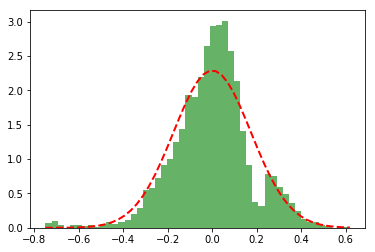

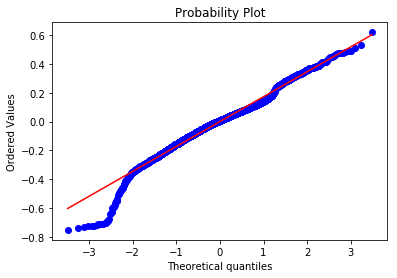

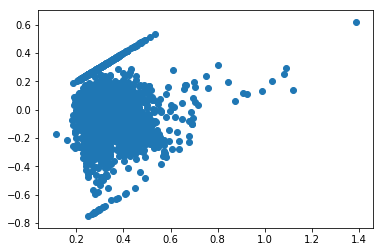

In [149]:
#### Check Assumptions for Multivariate Linear Regression ####

#Independence of Observations - Durbin-Watson Statistic
from statsmodels.stats.stattools import durbin_watson

X = data[LRVariables].values
y = data.iloc[:,-2].values

linreg = LinearRegression()

linreg.fit(X, y)
residuals = linreg.predict(X) - y
print(durbin_watson(residuals))

#Residuals are Approximately Normally Distributed - Histogram with Superimposed Normal Curve
from scipy.stats import norm

mu, sigma = norm.fit(residuals)
n, bins, patches = plt.hist(residuals, bins=50, density=True, alpha=0.6, color='g')
y = norm.pdf(bins, mu, sigma)
plt.plot(bins, y, 'r--', linewidth=2)

plt.show()

#Normal P-P Plot
from scipy import stats
stats.probplot(residuals, plot=plt)
plt.show()

#No Multicollinearity - Variance Inflation Factor higher than 10 or 
#Correlation Matrix with Magnitude of Correlation Coefficients greater that .80 
#-> Center Data by Subtracting Mean Score from Each Observation for Each Independent Variable
#Center Data by Subtracting Mean Score from Each Observation for Each Independent Variable
print(np.corrcoef(X, rowvar=False))

#Homoscedasticity
plt.scatter(linreg.predict(X), residuals)
plt.show()

In [121]:
#### Take Subsets of Variables and Perform Nested CV ####

import itertools

for i in range(len(LRVariables)):
    for key_set in list(itertools.combinations(LRVariables, i+1)):
        #print(list(key_set))
        
        X = data[list(key_set)].values
        y = data.iloc[:,-2].values

        linreg = LinearRegression()
        
        all_rmse = []
        
        i = 0
        kfold = KFold(10, shuffle=True)
        for train_index, test_index in kfold.split(X):
            X_train, X_test = X[train_index], X[test_index] 
            y_train, y_test = y[train_index], y[test_index]
            
            linreg.fit(X_train, y_train)
            
            y_pred = linreg.predict(X_test)
            rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
            all_rmse.append(rmse)
        print(str(list(key_set)) + " " + str(np.average(all_rmse)))

['HD02_S078'] 0.18382117700970552
['HD02_S081'] 0.1844954304199651
['HD02_S079'] 0.1893381324290757
['HD02_S057'] 0.18938535700491058
['HD02_S016'] 0.1894545907940591
['HD02_S078', 'HD02_S081'] 0.17610573437321253
['HD02_S078', 'HD02_S079'] 0.18381839782113568
['HD02_S078', 'HD02_S057'] 0.18145467327306788
['HD02_S078', 'HD02_S016'] 0.18054551328328036
['HD02_S081', 'HD02_S079'] 0.17667239987890598
['HD02_S081', 'HD02_S057'] 0.18152004336388305
['HD02_S081', 'HD02_S016'] 0.18121701476363172
['HD02_S079', 'HD02_S057'] 0.18471357081788561
['HD02_S079', 'HD02_S016'] 0.1839706098130618
['HD02_S057', 'HD02_S016'] 0.18789697796313873
['HD02_S078', 'HD02_S081', 'HD02_S079'] 0.17578198260472755
['HD02_S078', 'HD02_S081', 'HD02_S057'] 0.1755390259409037
['HD02_S078', 'HD02_S081', 'HD02_S016'] 0.17500386858949407
['HD02_S078', 'HD02_S079', 'HD02_S057'] 0.18156506222713592
['HD02_S078', 'HD02_S079', 'HD02_S016'] 0.18091668129722638
['HD02_S078', 'HD02_S057', 'HD02_S016'] 0.1803205422274674
['HD02

In [122]:
LRVariablesFilePath = "LRVariables"
with open(LRVariablesFilePath) as file:
    for line in file:
        key = line.rstrip("\n")
        print(dataColumnLabels[key])

Percent; RACE - Total population - One Race - White
Percent; RACE - Total population - One Race - Asian
Percent; RACE - Total population - One Race - Black or African American
Percent; SEX AND AGE - Female population - 25 to 29 years
Percent; SEX AND AGE - Total population - 70 to 74 years


In [169]:
#### Prediction Interval for Regression Predictions ####

import statsmodels.api as sm
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2)

X_train = train[LRVariables].values
y_train = train.iloc[:,-2].values
X_test = test[LRVariables].values
y_test = test.iloc[:,-2].values

model = sm.OLS(y_train, X_train).fit()

y_pred = model.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(rmse)

print(model.summary())

predictions = model.get_prediction(X_test)
predictions.summary_frame()
predictions.conf_int(obs=True)

0.17540128174128858
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     1670.
Date:                Sat, 02 Feb 2019   Prob (F-statistic):               0.00
Time:                        15:56:01   Log-Likelihood:                 698.86
No. Observations:                2261   AIC:                            -1388.
Df Residuals:                    2256   BIC:                            -1359.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0013      0.000

array([[-0.08838541,  0.60939835],
       [-0.07548468,  0.62228793],
       [-0.09575142,  0.60206942],
       ...,
       [-0.04079529,  0.65702661],
       [-0.05417734,  0.6435703 ],
       [-0.02843625,  0.66924328]])

In [4]:
AllCountyCensusDataFilePath = "../CensusData/CensusDemographicProfileData2010/CountyLevel/DEC_10_DP_DPDP1/DEC_10_DP_DPDP1_with_ann.csv"
countyCensusData = pd.read_csv(AllCountyCensusDataFilePath, skiprows=[1])

In [5]:
listOfCountyIds = countyCensusData.iloc[:,1].values
listOfCountyNames = countyCensusData.iloc[:,2].values
countyDict = dict(zip(listOfCountyIds, listOfCountyNames))

In [6]:
PresidentialElectionDataFilePath = "../ElectionData/US_County_Level_Election_Results_08-16/US_County_Level_Presidential_Results_08-16.csv"
presidentialElectionData = pd.read_csv(PresidentialElectionDataFilePath)

In [7]:
for cid in listOfCountyIds:
    if cid not in presidentialElectionData.iloc[:,0].values:
        print(countyDict[cid])

Aleutians East Borough, Alaska
Aleutians West Census Area, Alaska
Anchorage Municipality, Alaska
Bethel Census Area, Alaska
Bristol Bay Borough, Alaska
Denali Borough, Alaska
Dillingham Census Area, Alaska
Fairbanks North Star Borough, Alaska
Haines Borough, Alaska
Hoonah-Angoon Census Area, Alaska
Juneau City and Borough, Alaska
Kenai Peninsula Borough, Alaska
Ketchikan Gateway Borough, Alaska
Kodiak Island Borough, Alaska
Lake and Peninsula Borough, Alaska
Matanuska-Susitna Borough, Alaska
Nome Census Area, Alaska
North Slope Borough, Alaska
Northwest Arctic Borough, Alaska
Petersburg Census Area, Alaska
Prince of Wales-Hyder Census Area, Alaska
Sitka City and Borough, Alaska
Skagway Municipality, Alaska
Southeast Fairbanks Census Area, Alaska
Valdez-Cordova Census Area, Alaska
Wade Hampton Census Area, Alaska
Wrangell City and Borough, Alaska
Yakutat City and Borough, Alaska
Yukon-Koyukuk Census Area, Alaska
Kalawao County, Hawaii
Bedford city, Virginia


In [8]:
HouseElectionDataFilePath = "../ElectionData/NYTHouseElectionData/2018HouseResultsAggregated.csv"
houseElectionData = pd.read_csv(HouseElectionDataFilePath, header=None)

In [9]:
for cid in listOfCountyIds:
    if cid not in houseElectionData.iloc[:,1].values:
        print(countyDict[cid])

Choctaw County, Alabama
Dallas County, Alabama
Greene County, Alabama
Hale County, Alabama
Lowndes County, Alabama
Marengo County, Alabama
Perry County, Alabama
Pickens County, Alabama
Sumter County, Alabama
Wilcox County, Alabama
Aleutians East Borough, Alaska
Aleutians West Census Area, Alaska
Anchorage Municipality, Alaska
Bethel Census Area, Alaska
Bristol Bay Borough, Alaska
Denali Borough, Alaska
Dillingham Census Area, Alaska
Fairbanks North Star Borough, Alaska
Haines Borough, Alaska
Hoonah-Angoon Census Area, Alaska
Juneau City and Borough, Alaska
Kenai Peninsula Borough, Alaska
Ketchikan Gateway Borough, Alaska
Kodiak Island Borough, Alaska
Lake and Peninsula Borough, Alaska
Matanuska-Susitna Borough, Alaska
Nome Census Area, Alaska
North Slope Borough, Alaska
Northwest Arctic Borough, Alaska
Petersburg Census Area, Alaska
Prince of Wales-Hyder Census Area, Alaska
Sitka City and Borough, Alaska
Skagway Municipality, Alaska
Southeast Fairbanks Census Area, Alaska
Valdez-Cordov

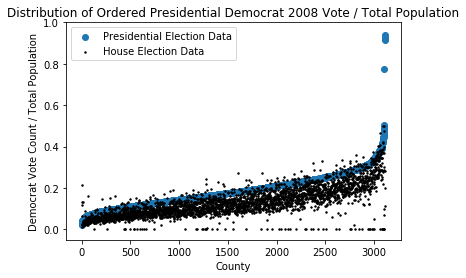

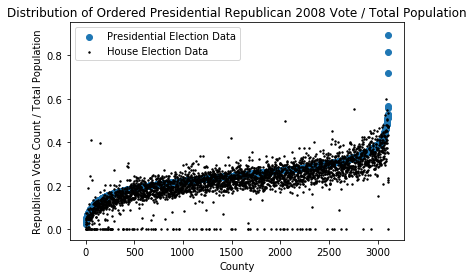

('Counties with Missing Democract House Data: ', 62)
('Counties with Missing Republican House Data: ', 97)
McCone County, Montana
2822
1734


In [10]:
#### Plot Distribution of Ordered Presidential Party Vote / Total Population ####

import numpy as np
from matplotlib import pyplot as plt

totalPopulationCounty_List = [s.split('(')[0] for s in countyCensusData.iloc[:,3].values]
totalPopulationCounty_Dict = dict(zip(listOfCountyIds, totalPopulationCounty_List))

#Democratic Vote Count
presidentialElectionData_CountyIds = presidentialElectionData.iloc[:,0].values
presidentialElectionData_Dem2008VoteCount = presidentialElectionData.iloc[:,3].values
presidentialElectionData_Dem2008VoteCount_Dict = dict(zip(presidentialElectionData_CountyIds, presidentialElectionData_Dem2008VoteCount))

presidentialElectionData_Dem2008VoteCount_TotalPopulation = {}
for county in presidentialElectionData_CountyIds:
    value = float(presidentialElectionData_Dem2008VoteCount_Dict.get(county))/float(totalPopulationCounty_Dict.get(county))
    presidentialElectionData_Dem2008VoteCount_TotalPopulation.update({county: value})
    
sorted_pED_DVC_TP = sorted(presidentialElectionData_Dem2008VoteCount_TotalPopulation, key=presidentialElectionData_Dem2008VoteCount_TotalPopulation.get)

houseElectionData_CountyIds = houseElectionData.iloc[:,1].values
houseElectionData_DemVoteCount = houseElectionData.iloc[:,3].values
houseElectionData_DemVoteCount_Dict = dict(zip(houseElectionData_CountyIds, houseElectionData_DemVoteCount))

pED_DVC_TP_sorted_HED_DVC_TP = []
for county in sorted_pED_DVC_TP:
    value = float(houseElectionData_DemVoteCount_Dict.get(county, 0))/float(totalPopulationCounty_Dict.get(county))
    pED_DVC_TP_sorted_HED_DVC_TP.append(value)
    
_,pEDvalues = zip(*presidentialElectionData_Dem2008VoteCount_TotalPopulation.items())
plt.scatter(range(len(pEDvalues)),sorted(pEDvalues),label="Presidential Election Data")
plt.scatter(range(len(pED_DVC_TP_sorted_HED_DVC_TP)),pED_DVC_TP_sorted_HED_DVC_TP,c='black',s=2,label="House Election Data")
plt.xlabel("County")
plt.ylabel("Democrat Vote Count / Total Population")
plt.title("Distribution of Ordered Presidential Democrat 2008 Vote / Total Population")
plt.legend()
plt.show()

#Republican Vote Count
presidentialElectionData_Rep2008VoteCount = presidentialElectionData.iloc[:,4].values
presidentialElectionData_Rep2008VoteCount_Dict = dict(zip(presidentialElectionData_CountyIds, presidentialElectionData_Rep2008VoteCount))

presidentialElectionData_Rep2008VoteCount_TotalPopulation = {}
for county in presidentialElectionData_CountyIds:
    value = float(presidentialElectionData_Rep2008VoteCount_Dict.get(county))/float(totalPopulationCounty_Dict.get(county))
    presidentialElectionData_Rep2008VoteCount_TotalPopulation.update({county: value})

sorted_pED_RVC_TP = sorted(presidentialElectionData_Rep2008VoteCount_TotalPopulation, key=presidentialElectionData_Rep2008VoteCount_TotalPopulation.get)

houseElectionData_RepVoteCount = houseElectionData.iloc[:,4].values
houseElectionData_RepVoteCount_Dict = dict(zip(houseElectionData_CountyIds, houseElectionData_RepVoteCount))

pED_RVC_TP_sorted_HED_RVC_TP = []
for county in sorted_pED_RVC_TP:
    value = float(houseElectionData_RepVoteCount_Dict.get(county, 0))/float(totalPopulationCounty_Dict.get(county))
    pED_RVC_TP_sorted_HED_RVC_TP.append(value)

_,pEDvalues = zip(*presidentialElectionData_Rep2008VoteCount_TotalPopulation.items())
plt.scatter(range(len(pEDvalues))[:-1],sorted(pEDvalues)[:-1],label="Presidential Election Data")
plt.scatter(range(len(pED_RVC_TP_sorted_HED_RVC_TP)),pED_RVC_TP_sorted_HED_RVC_TP,c='black',s=2,label="House Election Data")
plt.xlabel("County")
plt.ylabel("Republican Vote Count / Total Population")
plt.title("Distribution of Ordered Presidential Republican 2008 Vote / Total Population")
plt.legend()
plt.show()

print("Counties with Missing Democract House Data: ",len(filter(lambda x: (x==0),pED_DVC_TP_sorted_HED_DVC_TP)))
print("Counties with Missing Republican House Data: ",len(filter(lambda x: (x==0),pED_RVC_TP_sorted_HED_RVC_TP)))

print(countyDict[sorted_pED_RVC_TP[-1]])
print(presidentialElectionData_Rep2008VoteCount_Dict[sorted_pED_RVC_TP[-1]])
print(totalPopulationCounty_Dict[sorted_pED_RVC_TP[-1]])


In [11]:
#### Impute House Party Vote / Total Population Values from Distribution ####

#print(pED_DVC_TP_sorted_HED_DVC_TP[0])
#print(pED_RVC_TP_sorted_HED_RVC_TP[3])
##print(countyDict[sorted_pED_RVC_TP[0]])
##print(countyDict[sorted_pED_RVC_TP[1]])
##print(countyDict[sorted_pED_RVC_TP[2]])
##print(countyDict[sorted_pED_RVC_TP[3]])
##print(presidentialElectionData_Rep2008VoteCount_TotalPopulation[sorted_pED_RVC_TP[0]])
##print(presidentialElectionData_Rep2008VoteCount_TotalPopulation[sorted_pED_RVC_TP[1]])
##print(presidentialElectionData_Rep2008VoteCount_TotalPopulation[sorted_pED_RVC_TP[2]])
##print(presidentialElectionData_Rep2008VoteCount_TotalPopulation[sorted_pED_RVC_TP[3]])
#print(pED_DVC_TP_sorted_HED_DVC_TP[-1])
#print(pED_RVC_TP_sorted_HED_RVC_TP[-1])

missingHouseDemCounties = [countyDict[sorted_pED_DVC_TP[i]] for i, x in enumerate(pED_DVC_TP_sorted_HED_DVC_TP) if x == 0]
missingHouseRepCounties = [countyDict[sorted_pED_RVC_TP[i]] for i, x in enumerate(pED_RVC_TP_sorted_HED_RVC_TP) if x == 0]
#print(len(missingHouseDemCounties),len(missingHouseRepCounties))
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 
missingHouseBothCounties = intersection(missingHouseDemCounties,missingHouseRepCounties)
#print([x for x in missingHouseRepCounties if x not in missingHouseBothCounties])

In [13]:
#print(test)
#print(basic_test)

In [12]:
from scipy.ndimage import filters
d = np.arange(1, 21, dtype=np.float)
d = basic_test
d = test
print(d)
ker = (1.0/6.0)*np.array([1,1,1,0,1,1,1], dtype=np.float)
out = filters.convolve1d(d, ker)
print(out)
imputed_values = []
for i,x in enumerate(d):
    if x == 0:
        imputed_values.append(out[i])
    else:
        imputed_values.append(x)
print(imputed_values)
plt.plot(d)
plt.plot(imputed_values)

NameError: name 'basic_test' is not defined

In [13]:
def zero_runs(a):
    # Create an array that is 1 where a is 0, and pad each end with an extra 0.
    iszero = np.concatenate(([0], np.equal(a, 0).view(np.int8), [0]))
    absdiff = np.abs(np.diff(iszero))
    # Runs start and end where absdiff is 1.
    ranges = np.where(absdiff == 1)[0].reshape(-1, 2)
    return ranges

zero_runs(pED_DVC_TP_sorted_HED_DVC_TP)
max([abs(x[0]-x[1]) for x in zero_runs(pED_DVC_TP_sorted_HED_DVC_TP)])

zero_runs(pED_RVC_TP_sorted_HED_RVC_TP)
max([abs(x[0]-x[1]) for x in zero_runs(pED_RVC_TP_sorted_HED_RVC_TP)])

3

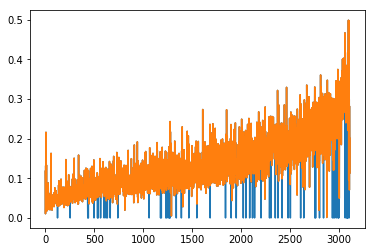

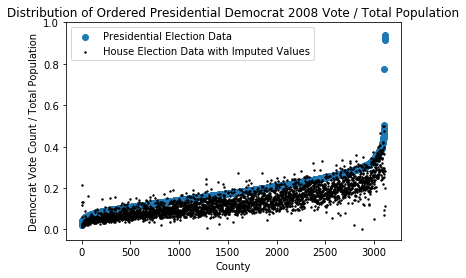

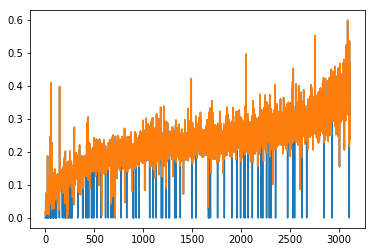

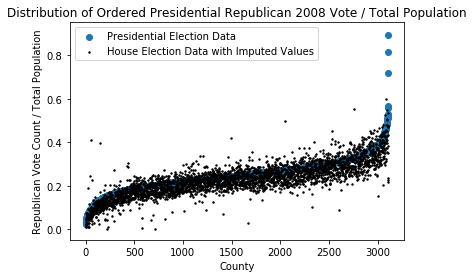

In [14]:
d=pED_DVC_TP_sorted_HED_DVC_TP
ker = (1.0/8.0)*np.array([1,1,1,1,0,1,1,1,1], dtype=np.float)
out = filters.convolve1d(d, ker)
imputed_HED_DVC_TP = []
for i,x in enumerate(d):
    if x == 0:
        imputed_HED_DVC_TP.append(out[i])
    else:
        imputed_HED_DVC_TP.append(x)
imputed_HED_DVC_TP_Dict = dict(zip(sorted_pED_DVC_TP,imputed_HED_DVC_TP))
plt.plot(d)
plt.plot(imputed_HED_DVC_TP)
plt.show()

_,pEDvalues = zip(*presidentialElectionData_Dem2008VoteCount_TotalPopulation.items())
plt.scatter(range(len(pEDvalues)),sorted(pEDvalues),label="Presidential Election Data")
plt.scatter(range(len(imputed_HED_DVC_TP)),imputed_HED_DVC_TP,c='black',s=2,label="House Election Data with Imputed Values")
plt.xlabel("County")
plt.ylabel("Democrat Vote Count / Total Population")
plt.title("Distribution of Ordered Presidential Democrat 2008 Vote / Total Population")
plt.legend()
plt.show()

d=pED_RVC_TP_sorted_HED_RVC_TP
ker = (1.0/8.0)*np.array([1,1,1,1,0,1,1,1,1], dtype=np.float)
out = filters.convolve1d(d, ker)
imputed_HED_RVC_TP = []
for i,x in enumerate(d):
    if x == 0:
        imputed_HED_RVC_TP.append(out[i])
    else:
        imputed_HED_RVC_TP.append(x)
imputed_HED_RVC_TP_Dict = dict(zip(sorted_pED_RVC_TP,imputed_HED_RVC_TP))
plt.plot(d)
plt.plot(imputed_HED_RVC_TP)
plt.show()

_,pEDvalues = zip(*presidentialElectionData_Rep2008VoteCount_TotalPopulation.items())
plt.scatter(range(len(pEDvalues))[:-1],sorted(pEDvalues)[:-1],label="Presidential Election Data")
plt.scatter(range(len(imputed_HED_RVC_TP)),imputed_HED_RVC_TP,c='black',s=2,label="House Election Data with Imputed Values")
plt.xlabel("County")
plt.ylabel("Republican Vote Count / Total Population")
plt.title("Distribution of Ordered Presidential Republican 2008 Vote / Total Population")
plt.legend()
plt.show()

In [486]:
#### Calculate Missing House Election Vote Counts ####

outputPath = "../ElectionData/NYTHouseElectionData/2018HouseResults_wImputed.csv"
with open(outputPath, mode = 'w') as output:
    writer = csv.writer(output, lineterminator="\n")
    writer.writerow(["fips","county_name","dem_vote_count","rep_vote_count"])
    
    for key in imputed_HED_DVC_TP_Dict.keys():
        writer.writerow([key,countyDict[key],imputed_HED_DVC_TP_Dict[key]*float(totalPopulationCounty_Dict[key]),imputed_HED_RVC_TP_Dict[key]*float(totalPopulationCounty_Dict[key])])

In [490]:
#### Reappend Target Values to Training Data (County Level Census Data Set) ####

AllCountyCensusDataFilePath = "../CensusData/CensusDemographicProfileData2010/CountyLevel/DEC_10_DP_DPDP1/DEC_10_DP_DPDP1_with_ann.csv"
with open(AllCountyCensusDataFilePath) as file:
    reader = csv.reader(file)

    outputPath = "../CensusData/CensusDemographicProfileData2010/CountyLevel/DEC_10_DP_DPDP1/DEC_10_DP_DPDP1_with_2018_house_imputed_election_results.csv"
    with open(outputPath, mode = 'w') as output:
        writer = csv.writer(output, lineterminator="\n")
        row = next(reader, None)
        writer.writerow(row + ["DemVC_TP", "RepVC_TP"])
        row = next(reader, None)
        writer.writerow(row + ["DemVoteCount_TotalPopulation", "RepVoteCount_TotalPopulation"])

        for row in reader:
            cID = int(row[1])
            DemVC_TP = imputed_HED_DVC_TP_Dict.get(cID,None)
            RepVC_TP = imputed_HED_RVC_TP_Dict.get(cID,None)
            if DemVC_TP is not None and RepVC_TP is not None:
                writer.writerow(row + [DemVC_TP, RepVC_TP])
            else:
                print(countyDict[cID])


Aleutians East Borough, Alaska
Aleutians West Census Area, Alaska
Anchorage Municipality, Alaska
Bethel Census Area, Alaska
Bristol Bay Borough, Alaska
Denali Borough, Alaska
Dillingham Census Area, Alaska
Fairbanks North Star Borough, Alaska
Haines Borough, Alaska
Hoonah-Angoon Census Area, Alaska
Juneau City and Borough, Alaska
Kenai Peninsula Borough, Alaska
Ketchikan Gateway Borough, Alaska
Kodiak Island Borough, Alaska
Lake and Peninsula Borough, Alaska
Matanuska-Susitna Borough, Alaska
Nome Census Area, Alaska
North Slope Borough, Alaska
Northwest Arctic Borough, Alaska
Petersburg Census Area, Alaska
Prince of Wales-Hyder Census Area, Alaska
Sitka City and Borough, Alaska
Skagway Municipality, Alaska
Southeast Fairbanks Census Area, Alaska
Valdez-Cordova Census Area, Alaska
Wade Hampton Census Area, Alaska
Wrangell City and Borough, Alaska
Yakutat City and Borough, Alaska
Yukon-Koyukuk Census Area, Alaska
Kalawao County, Hawaii
Bedford city, Virginia


In [15]:
#### Linear Regression Model on Party Vote / Total Population ####

CountyCensusDataFilePath = "../CensusData/CensusDemographicProfileData2010/CountyLevel/DEC_10_DP_DPDP1/DEC_10_DP_DPDP1_with_2018_house_imputed_election_results.csv"
data = pd.read_csv(CountyCensusDataFilePath, skiprows=[1])

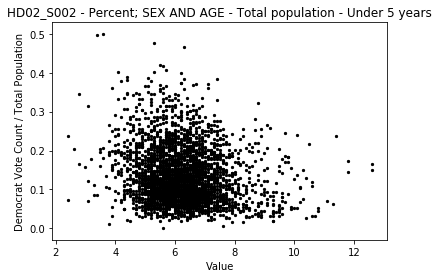

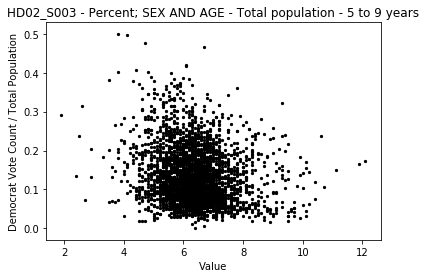

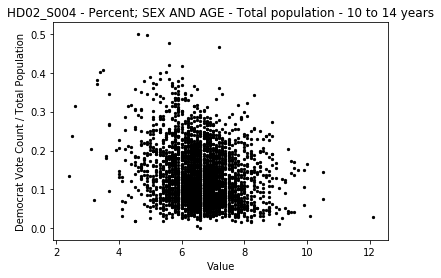

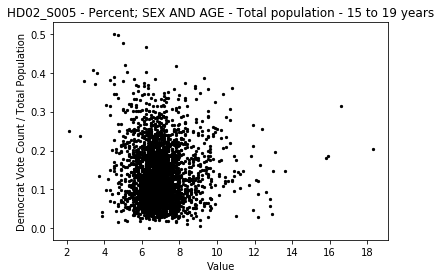

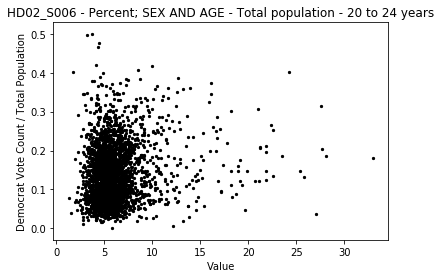

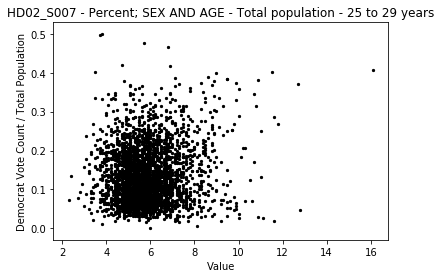

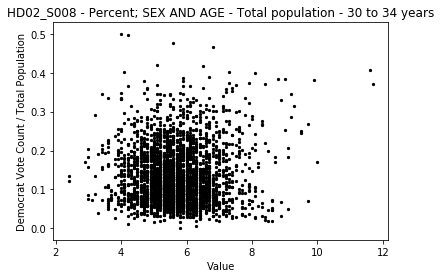

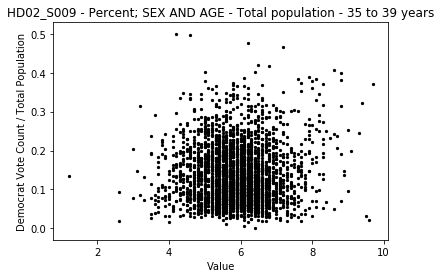

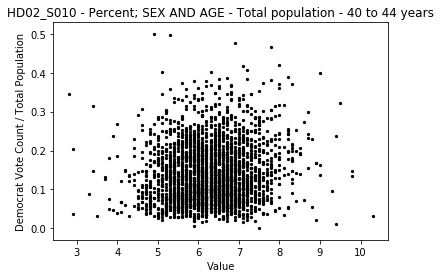

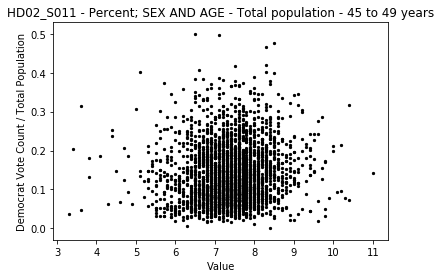

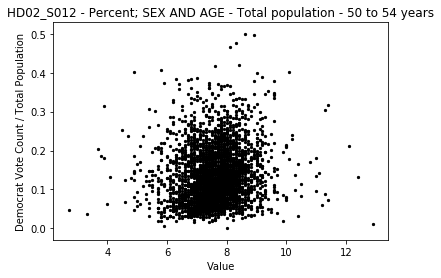

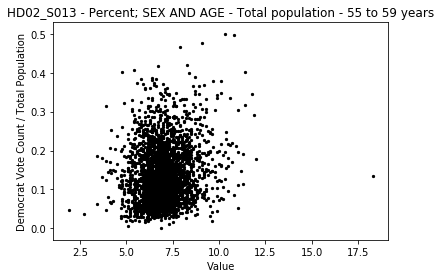

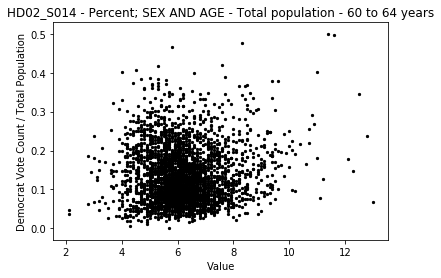

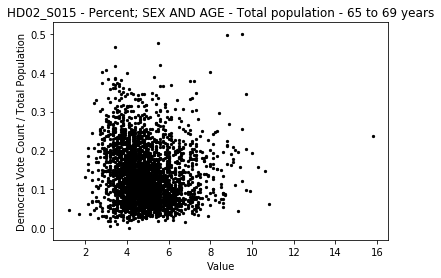

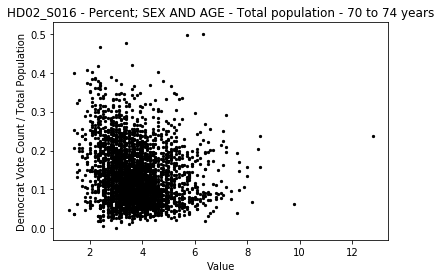

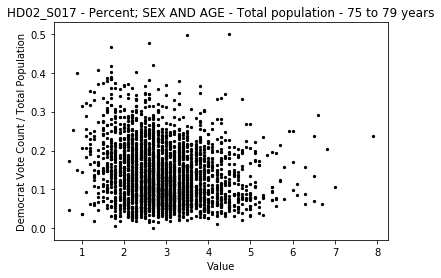

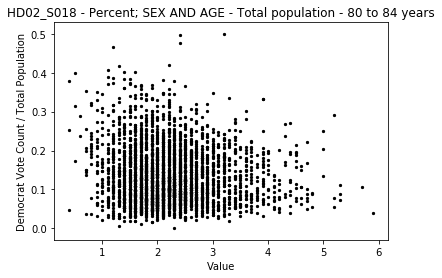

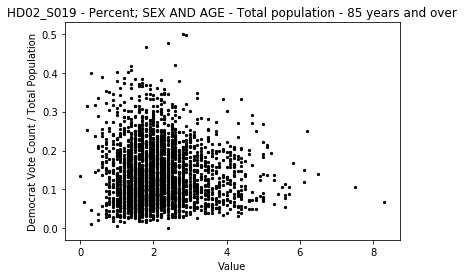

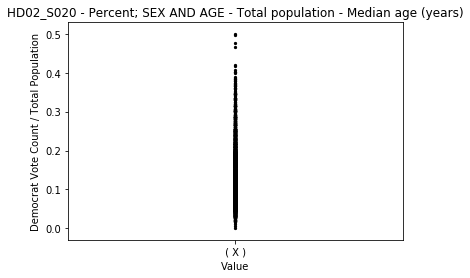

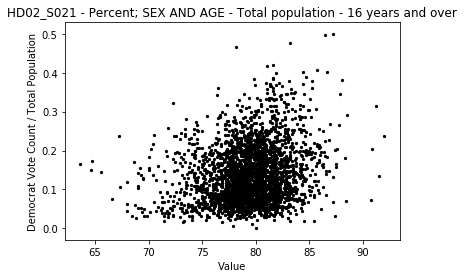

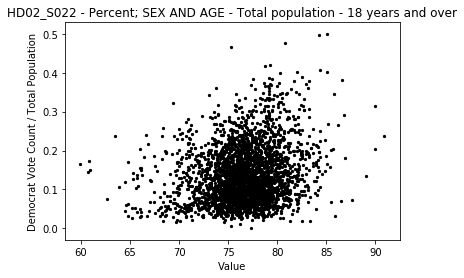

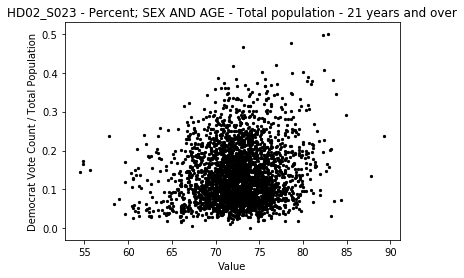

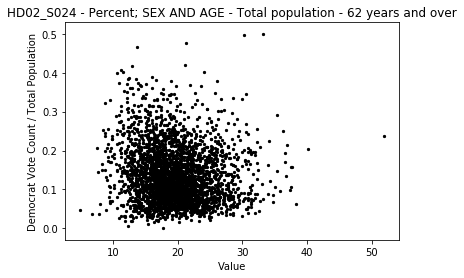

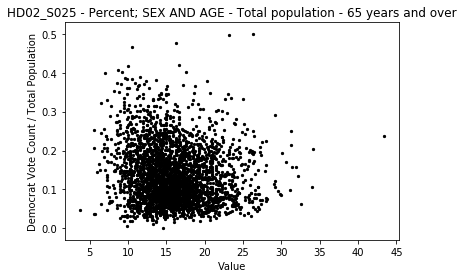

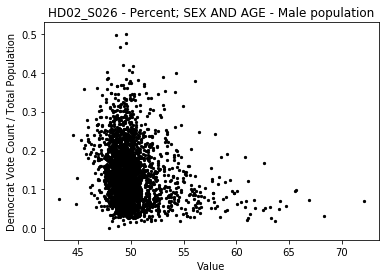

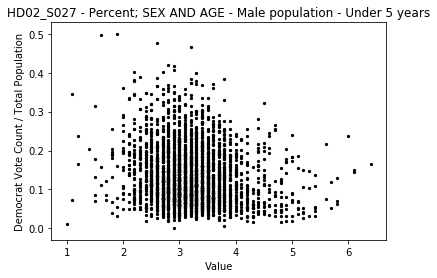

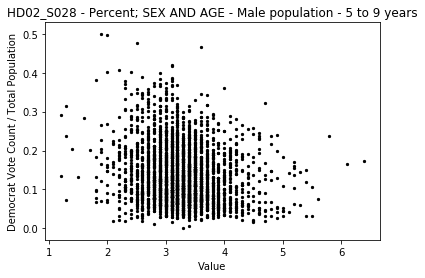

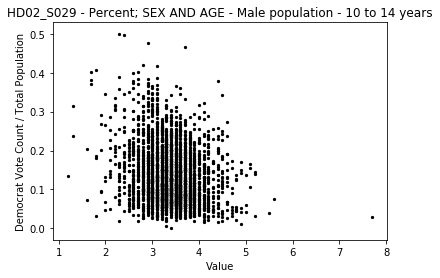

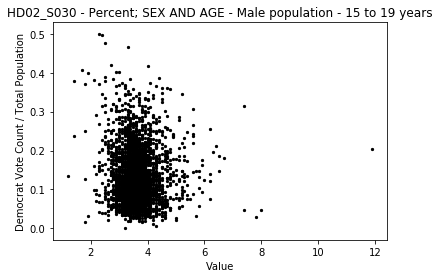

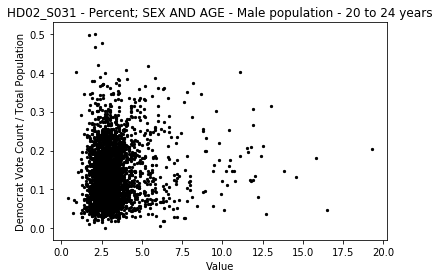

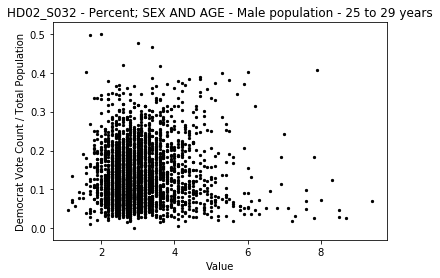

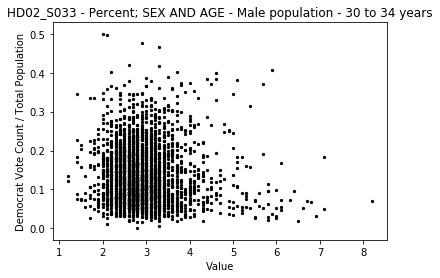

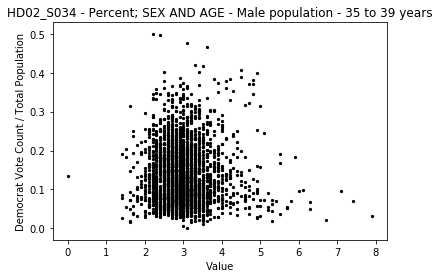

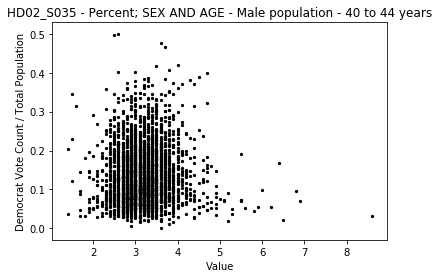

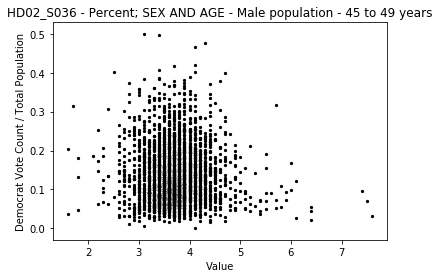

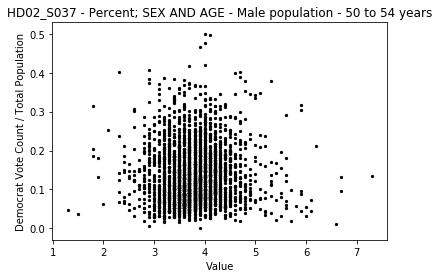

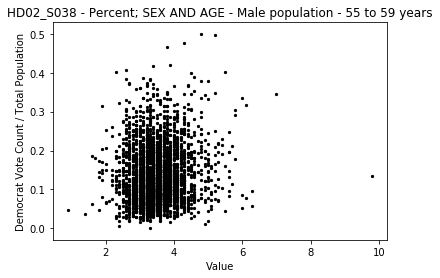

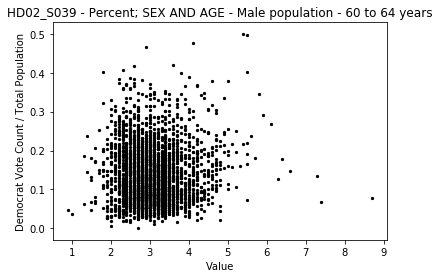

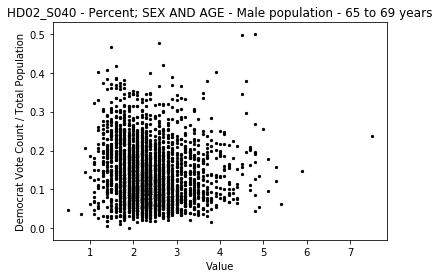

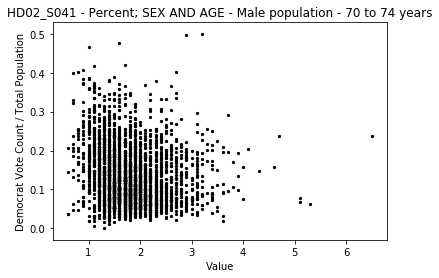

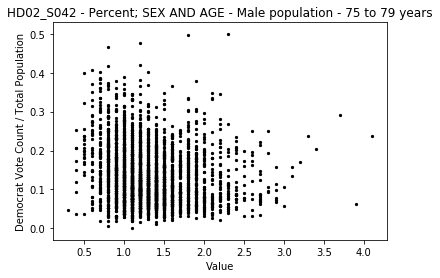

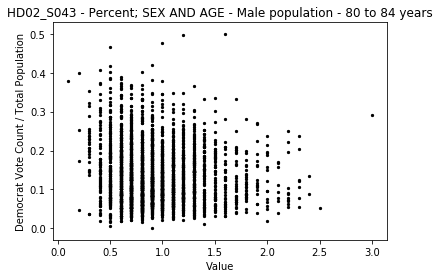

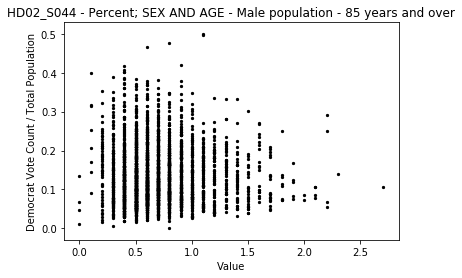

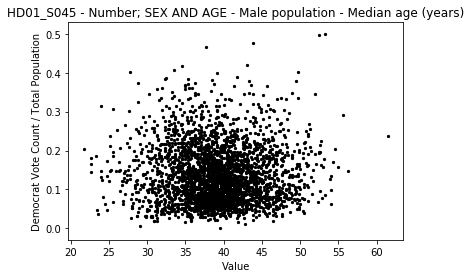

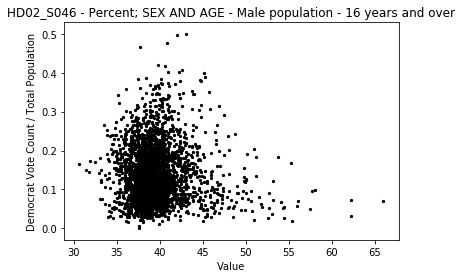

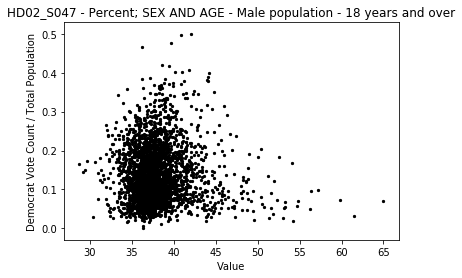

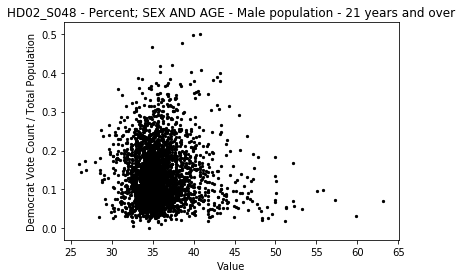

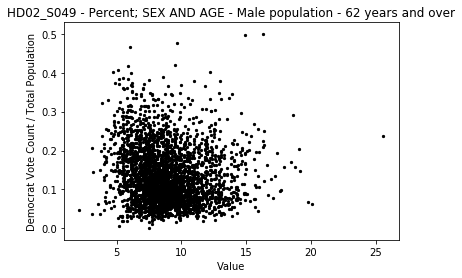

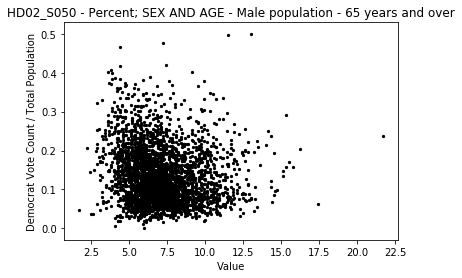

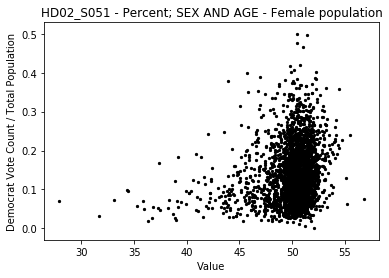

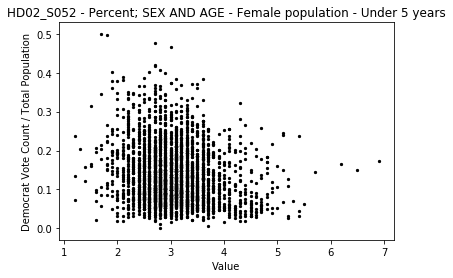

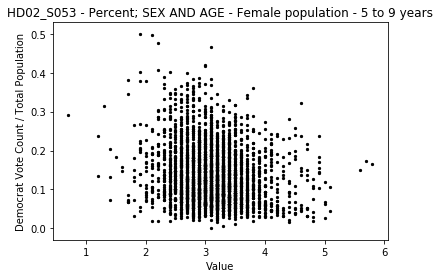

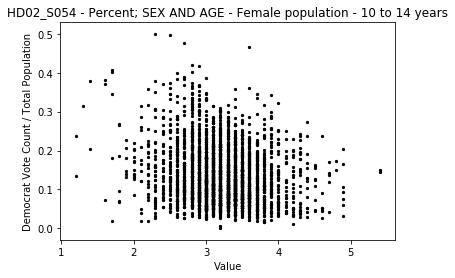

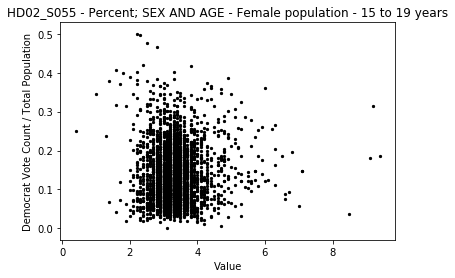

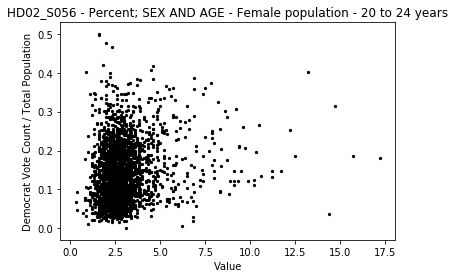

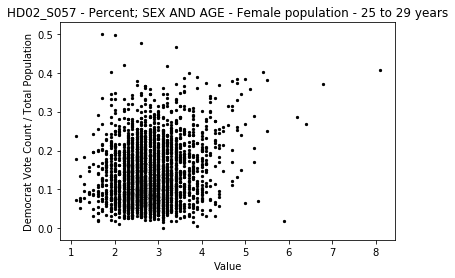

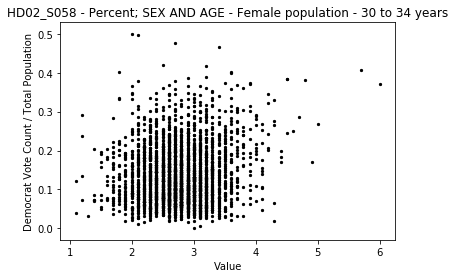

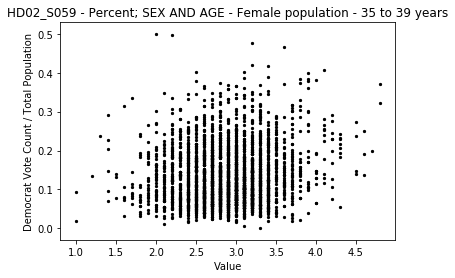

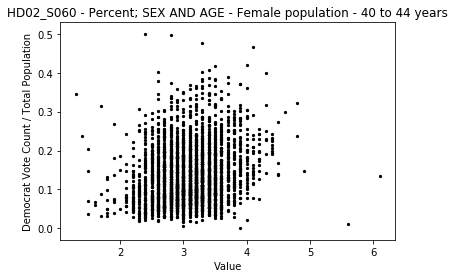

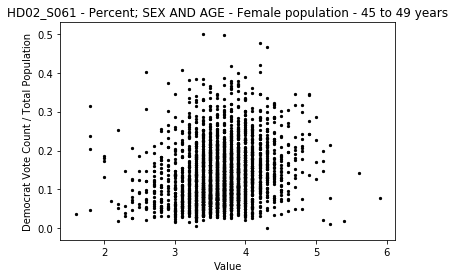

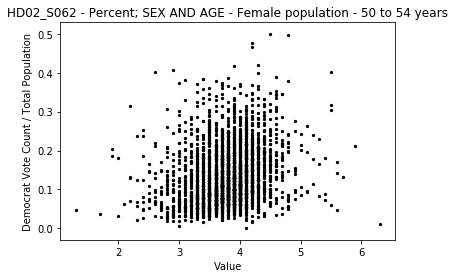

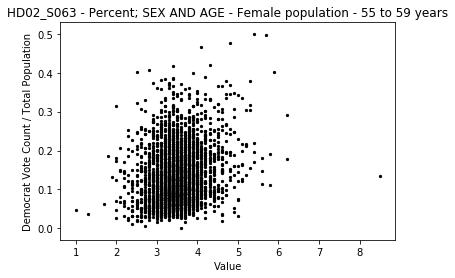

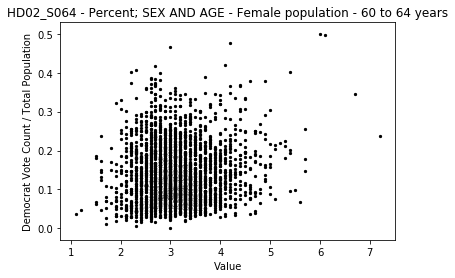

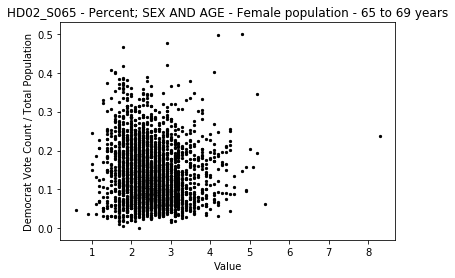

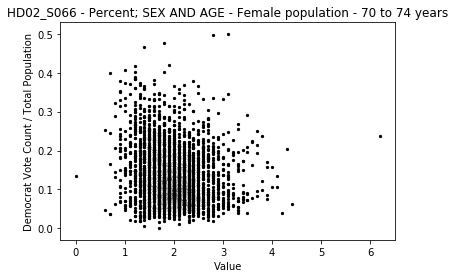

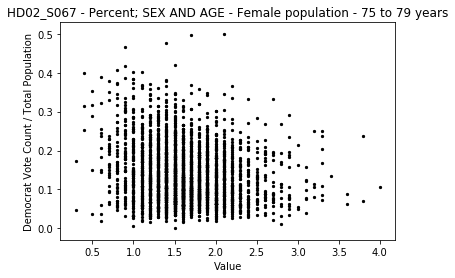

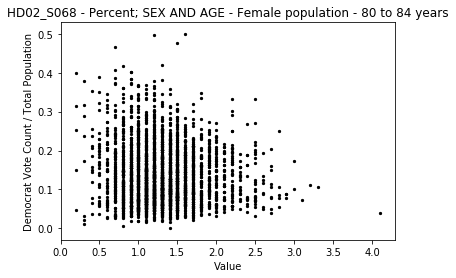

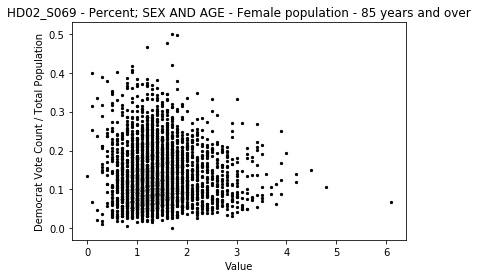

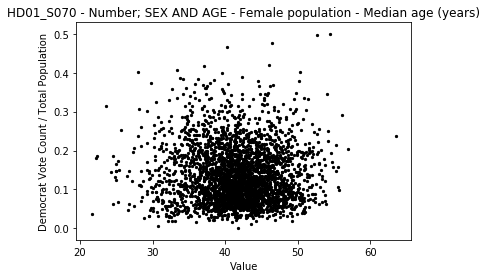

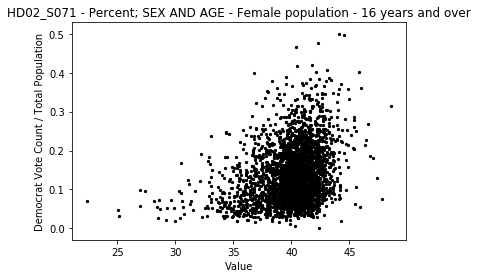

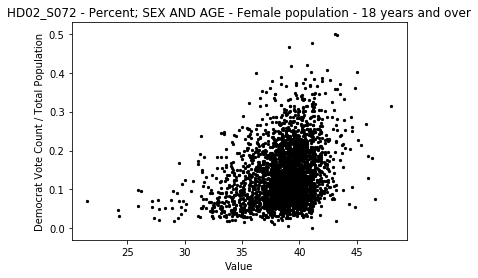

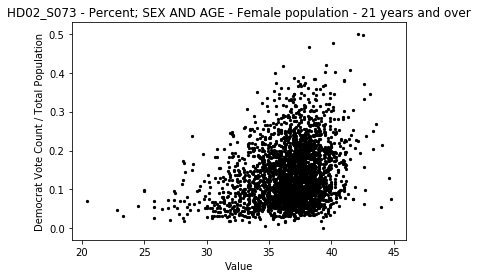

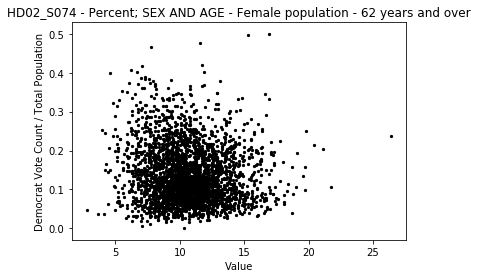

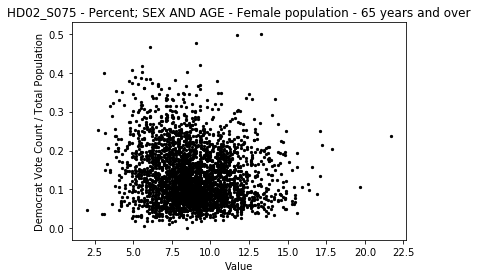

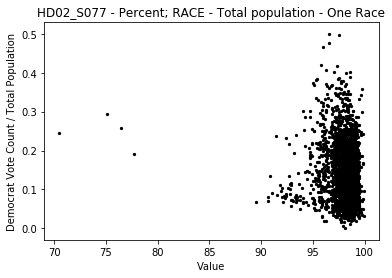

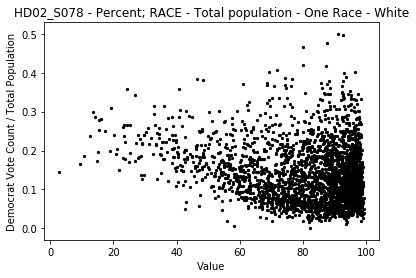

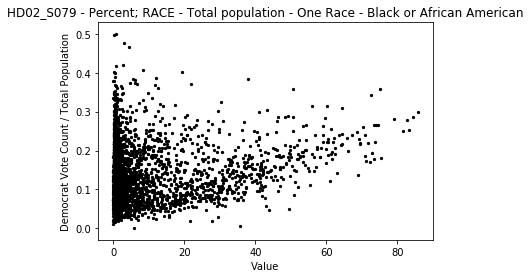

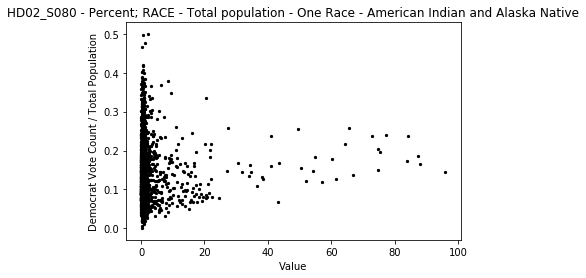

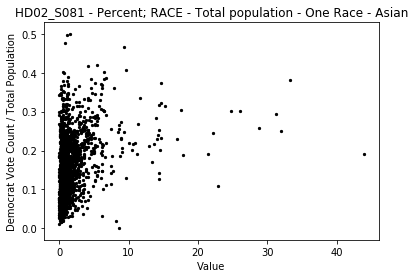

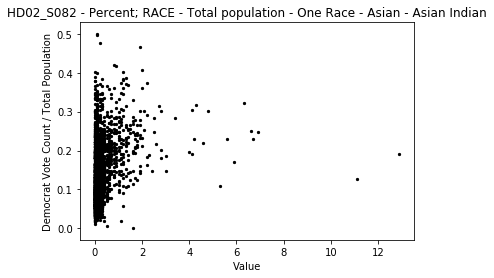

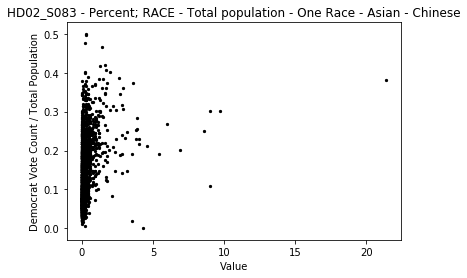

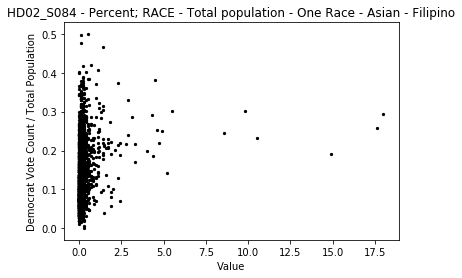

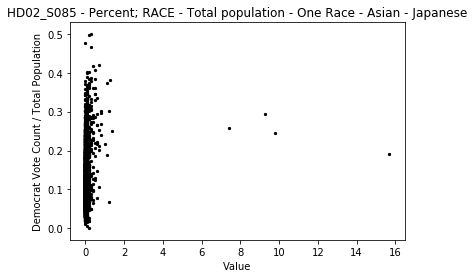

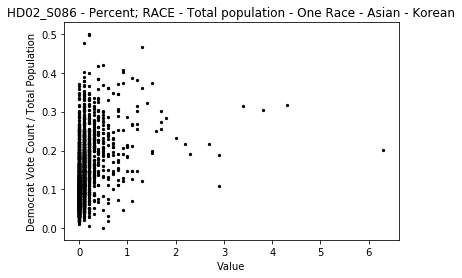

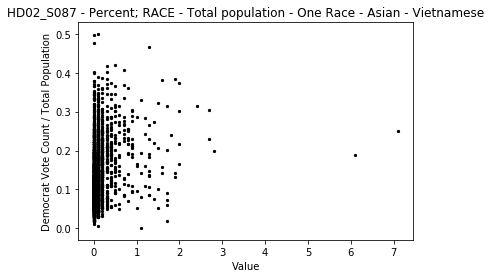

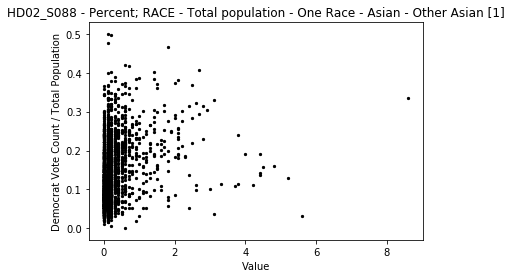

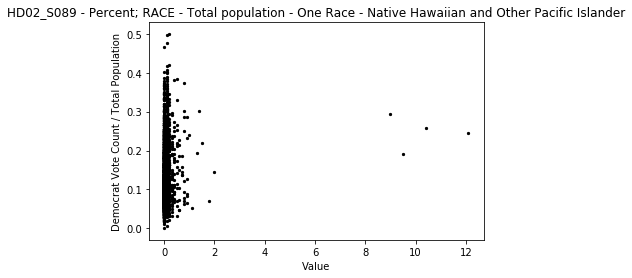

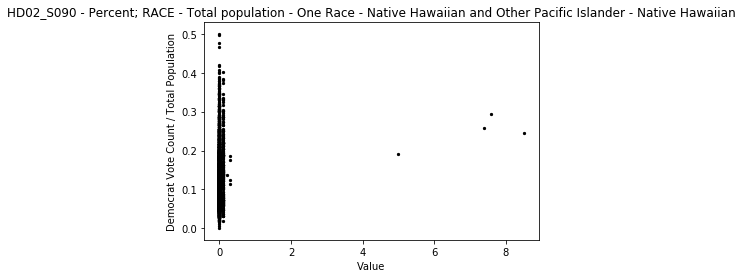

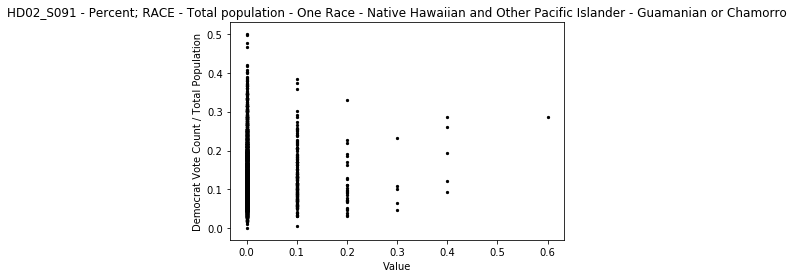

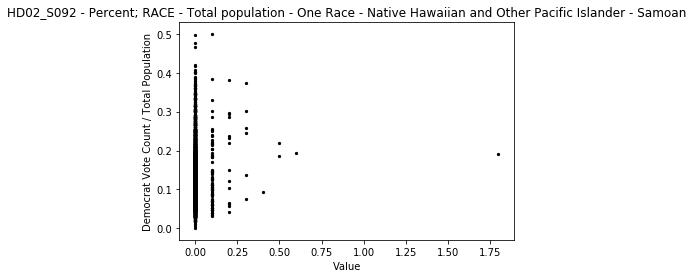

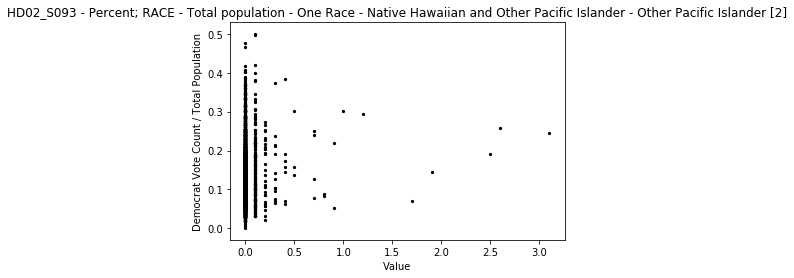

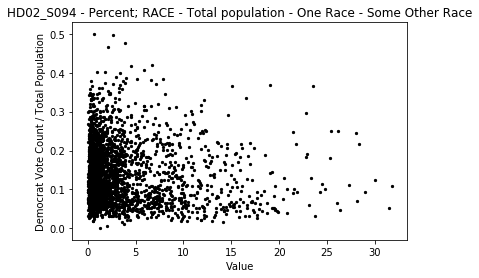

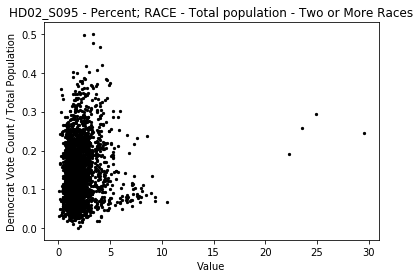

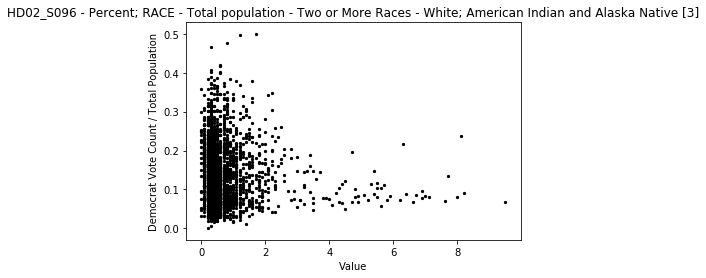

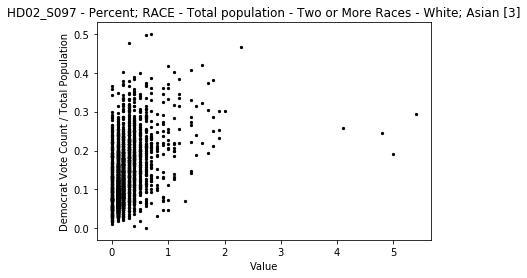

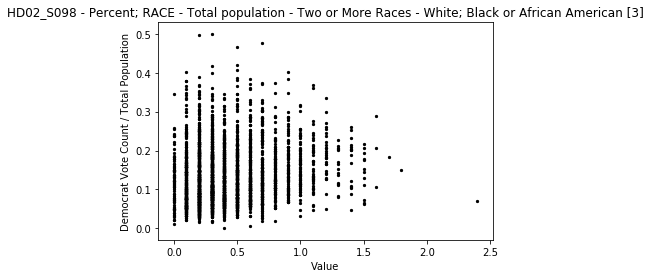

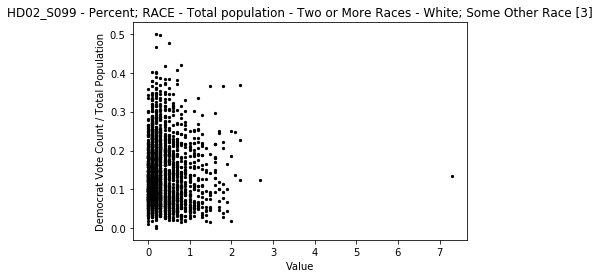

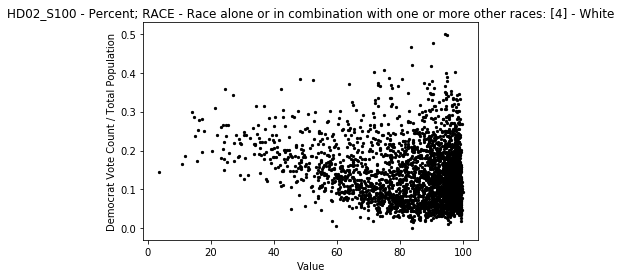

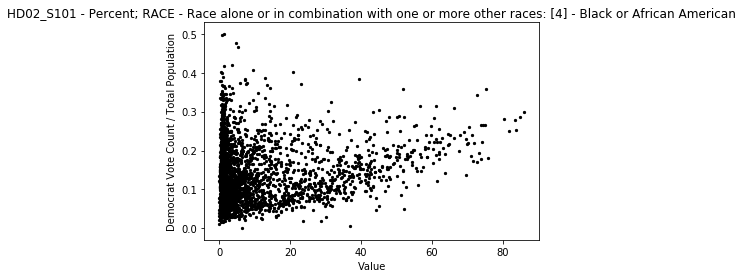

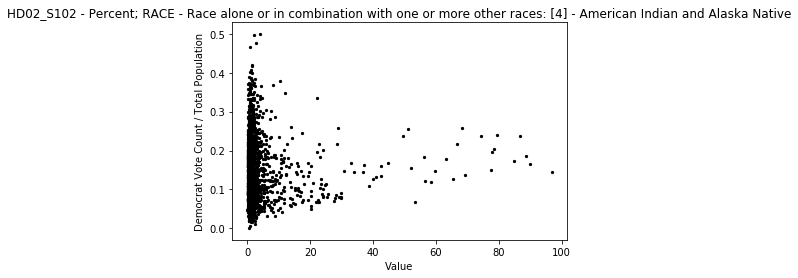

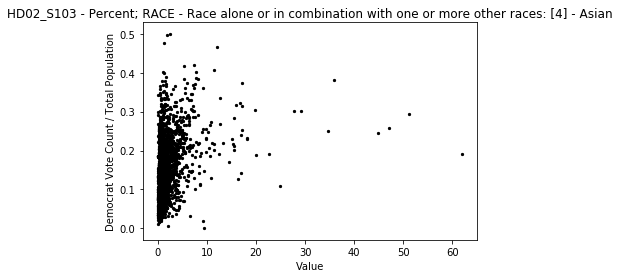

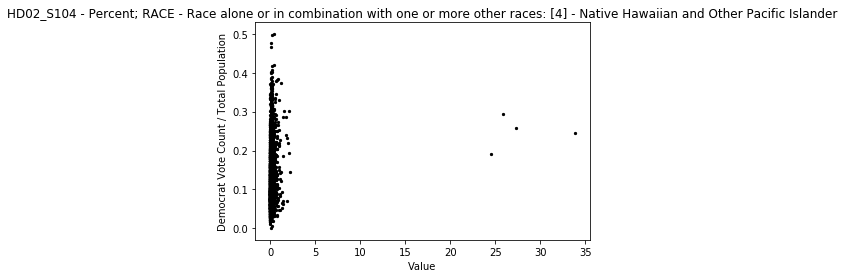

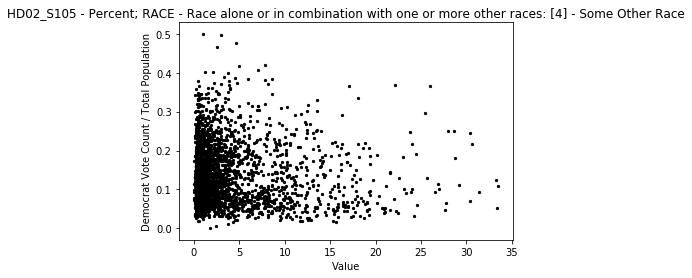

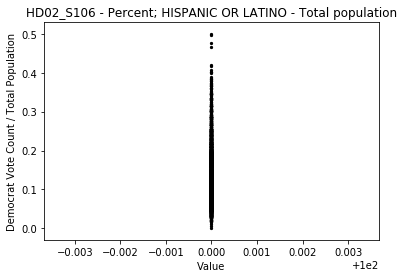

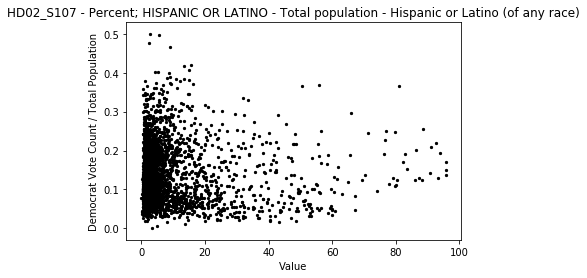

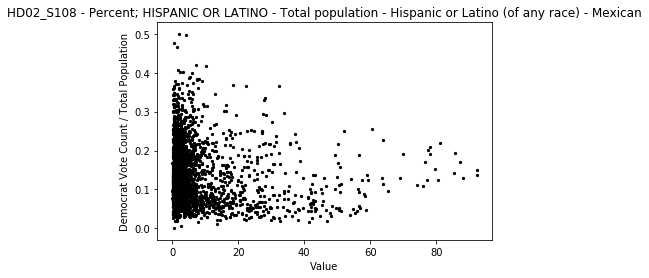

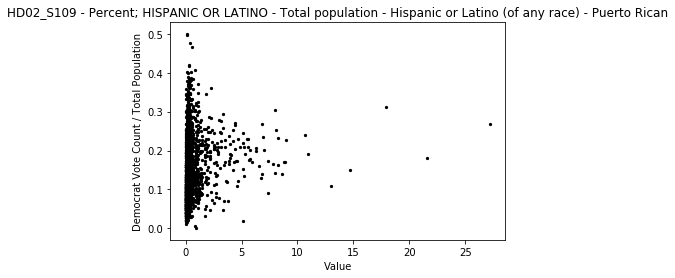

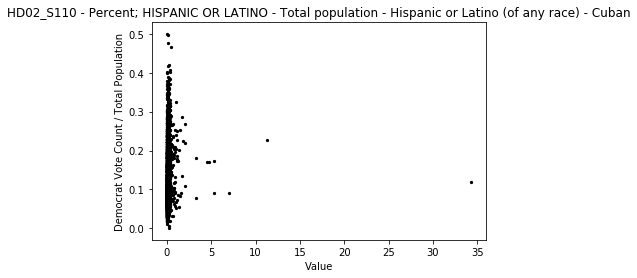

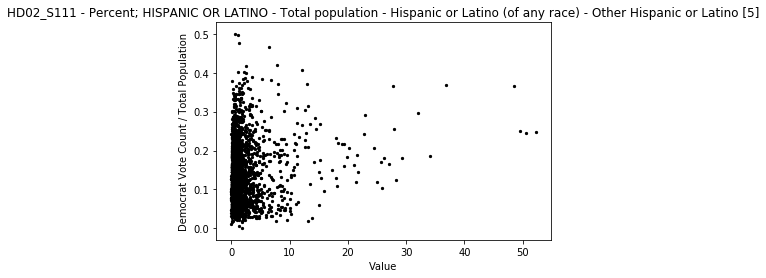

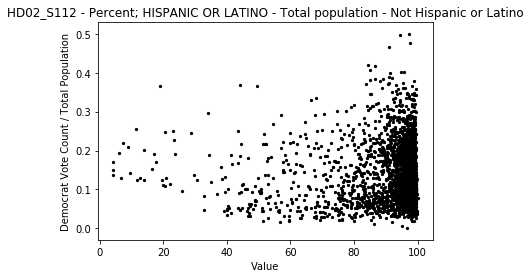

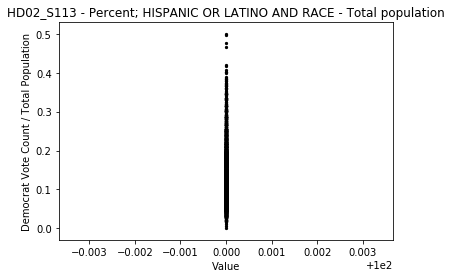

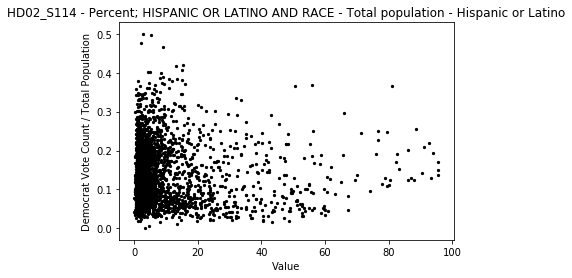

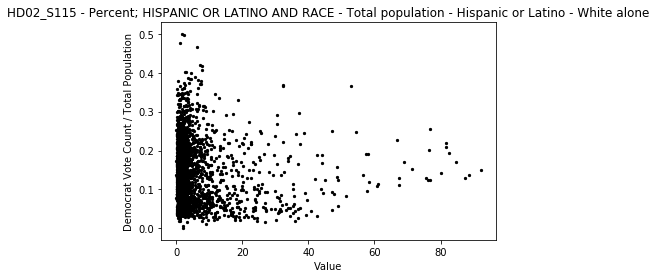

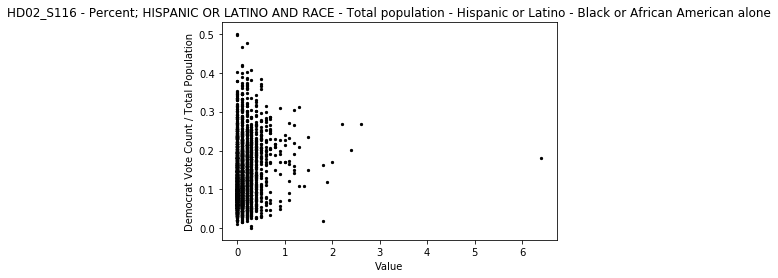

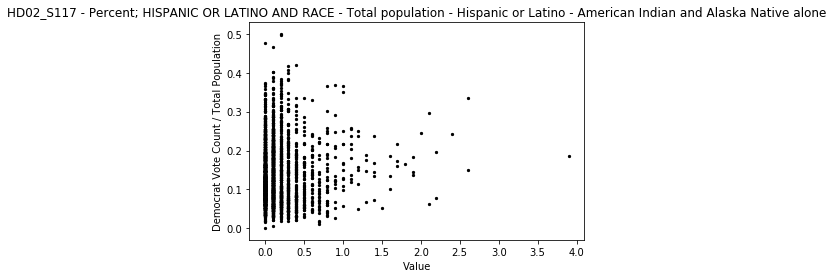

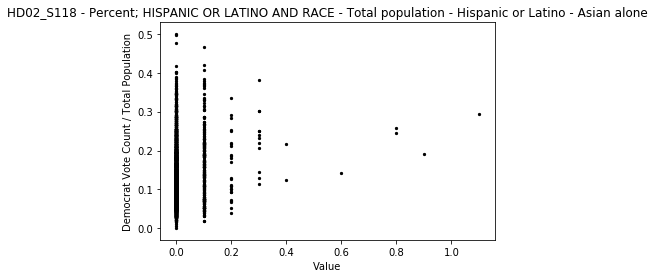

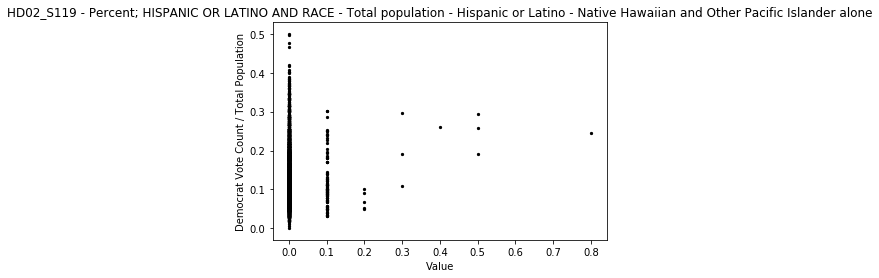

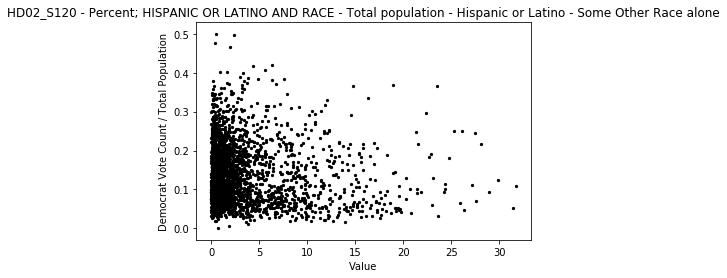

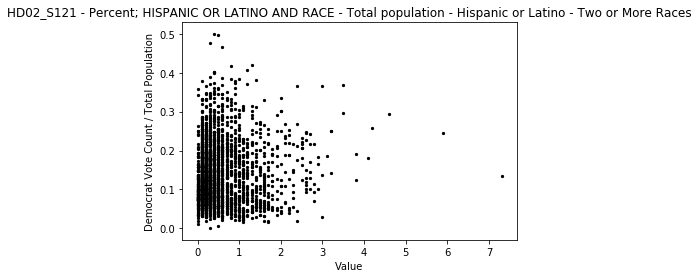

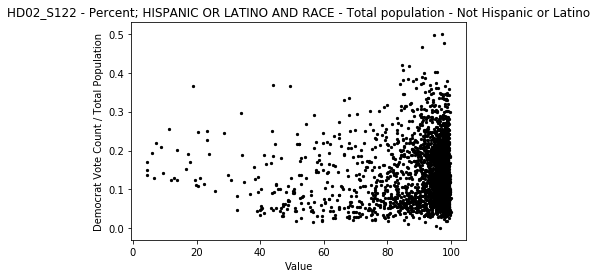

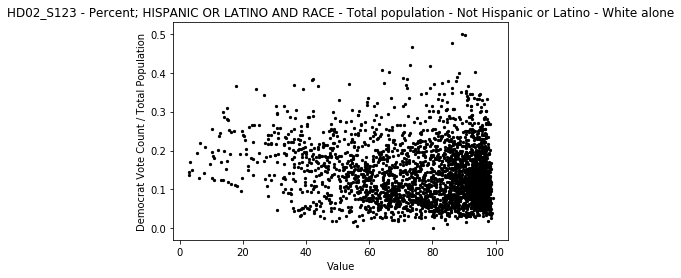

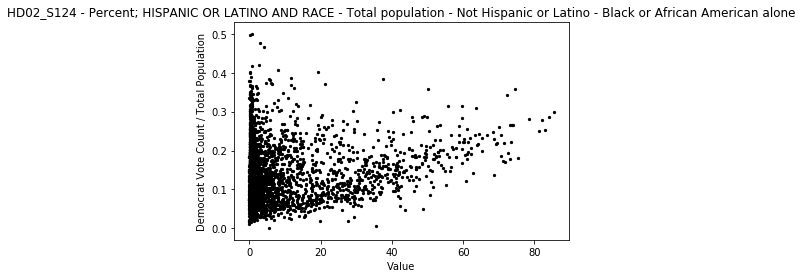

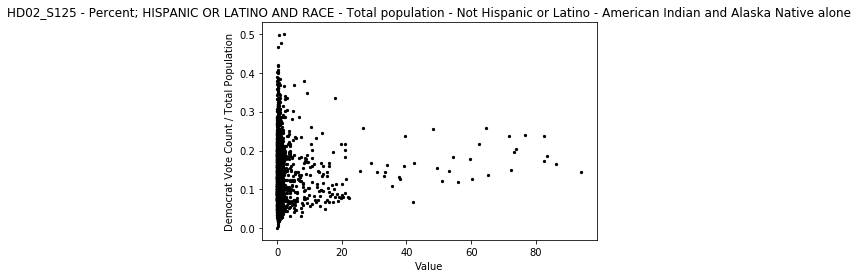

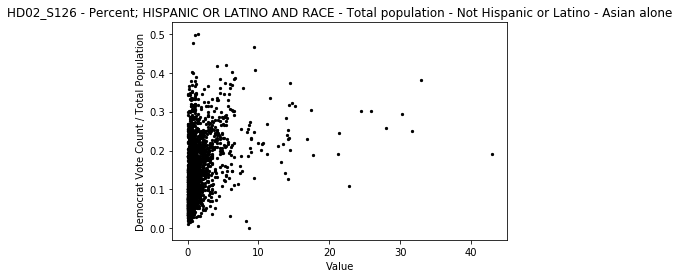

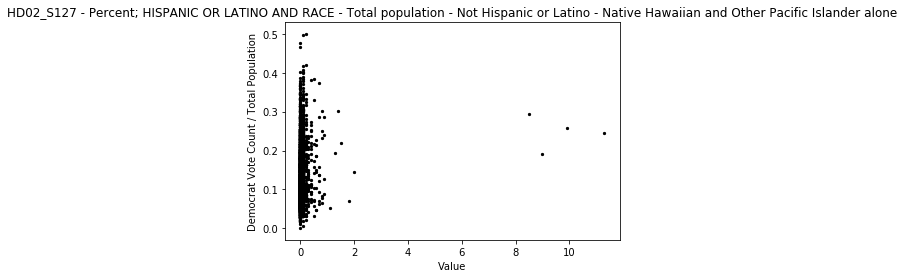

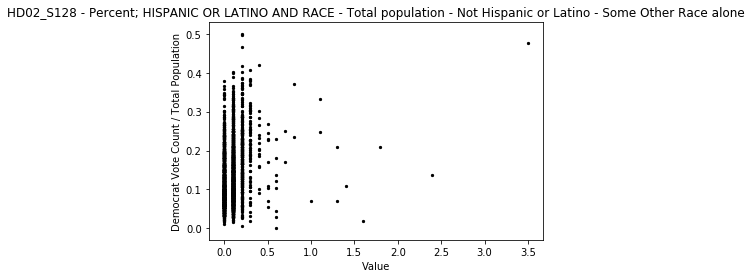

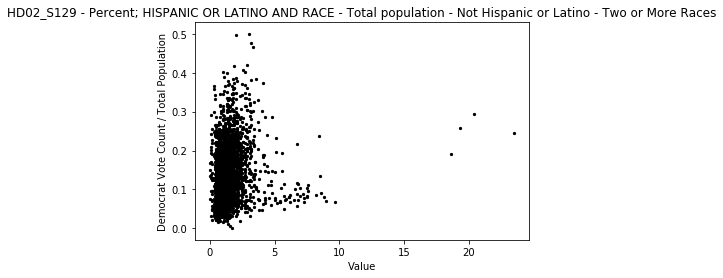

In [492]:
#### Visual Cut from Scatter Plot ####

PotentialLRVariablesFilePath = "PotentialLRVariables"
with open(PotentialLRVariablesFilePath) as file:
    for line in file:
        key = line.rstrip("\n")
        X = data[key].values
        y = data.iloc[:,-2].values
        plt.scatter(X, y, marker='o', s=5, color='black')
        plt.xlabel("Value")
        plt.ylabel("Democrat Vote Count / Total Population")
        plt.title(key+" - "+dataColumnLabels[key])
        plt.show()

In [16]:
#### Calculate Correlation Matrix + Heat Map ####

InitialCutLRVariablesFilePath = "InitialCutLRVariables"

correlationMatricies = {}

with open(InitialCutLRVariablesFilePath) as file:
    for line in file:
        key = line.rstrip("\n")
        X = data[key].values
        y = data.iloc[:,-2].values
        
        correlationMatricies.update({key: np.corrcoef(X, y, rowvar=False)})

for d in sorted(correlationMatricies.items(), key=lambda x: abs(x[1][0][1]), reverse=True):
    print(d[0])
    print(dataColumnLabels[d[0]])
    print(d[1][0][1])

HD02_S126
Percent; HISPANIC OR LATINO AND RACE - Total population - Not Hispanic or Latino - Asian alone
0.3419078119246643
HD02_S081
Percent; RACE - Total population - One Race - Asian
0.3406922459561114
HD02_S072
Percent; SEX AND AGE - Female population - 18 years and over
0.28176739876758344
HD02_S078
Percent; RACE - Total population - One Race - White
-0.23067089009488104
HD02_S073
Percent; SEX AND AGE - Female population - 21 years and over
0.2274001124938747
HD02_S100
Percent; RACE - Race alone or in combination with one or more other races: [4] - White
-0.22394198032286916
HD02_S123
Percent; HISPANIC OR LATINO AND RACE - Total population - Not Hispanic or Latino - White alone
-0.18866142714299905
HD02_S101
Percent; RACE - Race alone or in combination with one or more other races: [4] - Black or African American
0.18855140038384047
HD02_S057
Percent; SEX AND AGE - Female population - 25 to 29 years
0.18670967720093812
HD02_S056
Percent; SEX AND AGE - Female population - 20 to 24 

In [17]:
UpdatedLRVariables = []

LRVariablesFilePath = "LRVariables"
with open(LRVariablesFilePath) as file:
    for line in file:
        key = line.rstrip("\n")
        UpdatedLRVariables.append(key)
        print(dataColumnLabels[key])

Percent; RACE - Total population - One Race - White
Percent; RACE - Total population - One Race - Asian
Percent; RACE - Total population - One Race - Black or African American
Percent; SEX AND AGE - Female population - 25 to 29 years
Percent; SEX AND AGE - Total population - 70 to 74 years


In [18]:
#### K-Fold Cross Validation -> Average RMSE ####

from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X = data[UpdatedLRVariables].values
y = data.iloc[:,-2].values

lr_models = []
all_rmse = []

i = 0
kfold = KFold(10, shuffle=True)
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]
    
    model = sm.OLS(y_train, X_train).fit()
    #print(model.summary())
    lr_models.append(model)

    y_pred = model.predict(X_test)
    
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    all_rmse.append(rmse)

print(np.mean(all_rmse))

0.0669438268286448


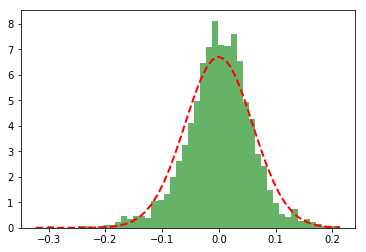

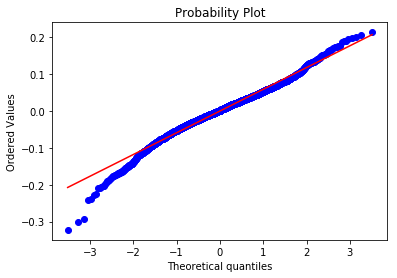

[[ 1.         -0.26496303 -0.82765461 -0.3997078   0.32818484]
 [-0.26496303  1.          0.03029221  0.36815857 -0.31894467]
 [-0.82765461  0.03029221  1.          0.27169574 -0.19659292]
 [-0.3997078   0.36815857  0.27169574  1.         -0.67660641]
 [ 0.32818484 -0.31894467 -0.19659292 -0.67660641  1.        ]]


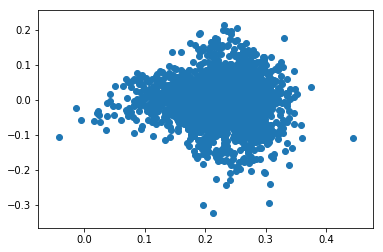

In [19]:
#### Check Assumptions for Multivariate Linear Regression ####

X = data[UpdatedLRVariables].values
y = data.iloc[:,-1].values

train, test = train_test_split(data, test_size=0.2)

X_train = train[UpdatedLRVariables].values
y_train = train.iloc[:,-1].values
X_test = test[UpdatedLRVariables].values
y_test = test.iloc[:,-1].values

#model = sm.OLS(y_train, X_train).fit()
#y_pred = model.predict(X_test)
#residuals = y_pred - y_test

model = sm.OLS(y, X).fit()
y_pred = model.predict(X)
residuals = y_pred - y

#Independence of Observations - Durbin-Watson Statistic
#print(durbin_watson(residuals))

#Residuals are Approximately Normally Distributed - Histogram with Superimposed Normal Curve
from scipy.stats import norm
mu, sigma = norm.fit(residuals)
n, bins, patches = plt.hist(residuals, bins=50, density=True, alpha=0.6, color='g')
y = norm.pdf(bins, mu, sigma)
plt.plot(bins, y, 'r--', linewidth=2)

plt.show()

#Normal P-P Plot
from scipy import stats
stats.probplot(residuals, plot=plt)
plt.show()

#No Multicollinearity - Variance Inflation Factor higher than 10 or 
#Correlation Matrix with Magnitude of Correlation Coefficients greater that .80 
#-> Center Data by Subtracting Mean Score from Each Observation for Each Independent Variable
print(np.corrcoef(X, rowvar=False))

#Homoscedasticity
plt.scatter(y_pred, residuals)
plt.show()

In [531]:
#### Take Subsets of Variables and Perform Nested CV ####

for i in range(len(UpdatedLRVariables)):
    for key_set in list(itertools.combinations(UpdatedLRVariables, i+1)):
        #print(list(key_set))
        
        X = data[list(key_set)].values
        y = data.iloc[:,-2].values

        all_rmse = []
        
        i = 0
        kfold = KFold(10, shuffle=True)
        for train_index, test_index in kfold.split(X):
            X_train, X_test = X[train_index], X[test_index] 
            y_train, y_test = y[train_index], y[test_index]
            
            model = sm.OLS(y_train, X_train).fit()
            y_pred = model.predict(X_test)
            rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
            all_rmse.append(rmse)
        print(str(list(key_set)) + " " + str(np.average(all_rmse)))

['HD02_S081'] 0.13061877869009808
['HD02_S072'] 0.07003890279767458
['HD02_S078'] 0.08190608014308112
['HD02_S057'] 0.07222637726982181
['HD02_S056'] 0.08265459921405341
['HD02_S079'] 0.1293216493155975
['HD02_S016'] 0.08543992110812224
['HD02_S081', 'HD02_S072'] 0.06596860063541495
['HD02_S081', 'HD02_S078'] 0.07448827730716567
['HD02_S081', 'HD02_S057'] 0.07037044462202728
['HD02_S081', 'HD02_S056'] 0.08014482804847452
['HD02_S081', 'HD02_S079'] 0.11406728942530464
['HD02_S081', 'HD02_S016'] 0.07616759622104756
['HD02_S072', 'HD02_S078'] 0.06679231398445042
['HD02_S072', 'HD02_S057'] 0.06937361756279224
['HD02_S072', 'HD02_S056'] 0.06924647248473184
['HD02_S072', 'HD02_S079'] 0.06894425223442699
['HD02_S072', 'HD02_S016'] 0.06715994710051147
['HD02_S078', 'HD02_S057'] 0.07190937977342546
['HD02_S078', 'HD02_S056'] 0.0753472677568238
['HD02_S078', 'HD02_S079'] 0.07350526392862916
['HD02_S078', 'HD02_S016'] 0.08138406653928179
['HD02_S057', 'HD02_S056'] 0.07201421411997269
['HD02_S057'

In [20]:
#### Predict Party Vote / Total Population for Census Tracts ####

X = data[UpdatedLRVariables].values
yD = data.iloc[:,-2].values
yR = data.iloc[:,-1].values

D_model = sm.OLS(yD, X).fit()
print(D_model.summary())
R_model = sm.OLS(yR, X).fit()
print(R_model.summary())

TractPredictions = {}
TractPopulation = {}

StateAbbrFile = "StateAbbreviations"
with open(StateAbbrFile) as file:
    for line in file:
        state = line.rstrip("\n")
        
        TractCensusDataFilePath = "../CensusData/CensusDemographicProfileData2010/CensusTractLevel/"+state+"_DEC_10_DP_DPDP1/DEC_10_DP_DPDP1_with_ann.csv"
        tract_data = pd.read_csv(TractCensusDataFilePath, skiprows=[1], na_values=["(X)"])
        tract_IDs = tract_data.iloc[:,1].values
        tract_Population = [float(str(s).split('(')[0]) for s in tract_data.iloc[:,3].values]
        tract_X = np.array(tract_data[UpdatedLRVariables].values, dtype=np.float32)
        #print(tract_X)
        tract_D_Predict = D_model.predict(tract_X)
        tract_R_Predict = R_model.predict(tract_X)
        
        for i,tID in enumerate(tract_IDs):
            tDPi = max(0, min(tract_D_Predict[i], 1))
            tRPi = max(0, min(tract_R_Predict[i], 1))
            
            TractPredictions.update({tID:(tDPi,tRPi)})
            TractPopulation.update({tID:tract_Population[i]})

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     2640.
Date:                Wed, 10 Apr 2019   Prob (F-statistic):               0.00
Time:                        21:24:06   Log-Likelihood:                 4000.3
No. Observations:                3112   AIC:                            -7991.
Df Residuals:                    3107   BIC:                            -7960.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0008   9.91e-05      8.416      0.0

/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (3,153,213,227,261,263,287,301,339,341,343,361) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (263,301,339,341,343,361) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (287,343) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (343) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=int

In [21]:
print(TractPredictions[1099075600], TractPopulation[1099075600])

((0.17367768549322574, 0.13193565925682624), 1341.0)


In [22]:
#### Check Sum of Census Tract Predictions Equal County Level Values ####
#### TODO: Further Analysis and Investigation

totalTractDRVC = [0,0]
c = 0
for tID in TractPopulation.keys():
    if not np.isnan(TractPredictions[tID][0]) and not np.isnan(TractPredictions[tID][1]):
        totalTractDRVC[0] += TractPredictions[tID][0] * TractPopulation[tID]
        totalTractDRVC[1] += TractPredictions[tID][1] * TractPopulation[tID]
    else:
        c += 1
print(totalTractDRVC, c)

totalCountyDRVC = [0,0]
for cID in imputed_HED_DVC_TP_Dict.keys():
    totalCountyDRVC[0] += imputed_HED_DVC_TP_Dict[cID]*float(totalPopulationCounty_Dict[cID])
    totalCountyDRVC[1] += imputed_HED_RVC_TP_Dict[cID]*float(totalPopulationCounty_Dict[cID])
print(totalCountyDRVC)

TractDistrictSplitFilePath = "../tract_district_splits.csv"
County_Tracts = {}
CountyDistrict_Tracts = {}
with open(TractDistrictSplitFilePath) as file:
    reader = csv.reader(file)
    next(reader, None)
    for row in reader:
        if row[2] == 'current':
            cID = int(row[3])
            tID = int(row[4])
            district = int(row[5])
            percentage = float(row[6])
            
            if County_Tracts.has_key(cID):
                TractList = County_Tracts[cID]
                TractList.append((tID, percentage))
                County_Tracts[cID] = TractList
            else:
                County_Tracts.update({cID:[(tID, percentage)]})
                
            if CountyDistrict_Tracts.has_key((cID, district)):
                TractList = CountyDistrict_Tracts[(cID, district)]
                TractList.append((tID, percentage))
                CountyDistrict_Tracts[(cID, district)] = TractList
            else:
                CountyDistrict_Tracts.update({(cID, district):[(tID, percentage)]})

c_pop_resid = []
for cID in County_Tracts.keys():
    t_C = float(totalPopulationCounty_Dict[cID])

    t_T = 0
    TractList = County_Tracts[cID]
    for tract in TractList:
        tID = tract[0]
        percentage = tract[1]
        t_T += TractPopulation.get(tID, 0) * percentage
    #print(cID, t_C, t_T)
    c_pop_resid.append(abs(t_C - t_T))
print(np.mean(c_pop_resid))

dvc_resid = {}
rvc_resid = {}
#73,057 Census Tracts - 2010 Census National Geographic Tallies
#c = 0
for cID in County_Tracts.keys():
    d_C = imputed_HED_DVC_TP_Dict.get(cID,0)*float(totalPopulationCounty_Dict.get(cID,0))
    r_C = imputed_HED_RVC_TP_Dict.get(cID,0)*float(totalPopulationCounty_Dict.get(cID,0))

    d_T = 0
    r_T = 0
    TractList = County_Tracts[cID]
    for tract in TractList:
        #c += 1
        tID = tract[0]
        percentage = tract[1]
        if not np.isnan(TractPredictions.get(tID,(0,0))[0]):
            d_T += TractPredictions.get(tID,(0,0))[0] * TractPopulation.get(tID, 0) * percentage
        if not np.isnan(TractPredictions.get(tID,(0,0))[1]):
            r_T += TractPredictions.get(tID,(0,0))[1] * TractPopulation.get(tID, 0) * percentage
    #print(cID, d_C, d_T)
    #print(cID, r_C, r_T)
    dvc_resid.update({cID:abs(d_C - d_T)})
    rvc_resid.update({cID:abs(r_C - r_T)})
sorted_dvc_resid = sorted(dvc_resid, key=dvc_resid.get, reverse = True)
sorted_rvc_resid = sorted(rvc_resid, key=rvc_resid.get, reverse = True)
#for i in range(100):
    #cID = sorted_dvc_resid[i]
    #print(countyDict[cID], cID, dvc_resid[cID], float(totalPopulationCounty_Dict[cID]))
    #cID = sorted_rvc_resid[i]
    #print(countyDict[cID], cID, rvc_resid[cID], float(totalPopulationCounty_Dict[cID]))
#print(c)

([54441910.22310992, 54426416.27797772], 0)
[57025164.3688008, 50190284.73723153]
169.22091822726685


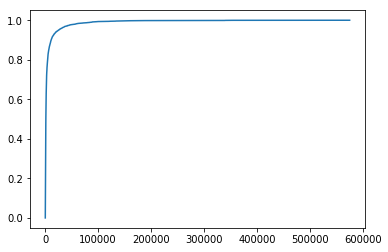

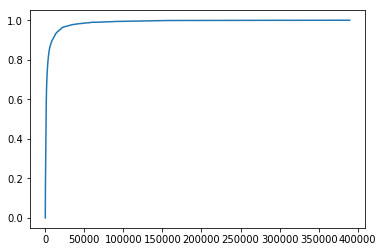

In [23]:
sorted_data = sorted(dvc_resid.values())
yvals=np.arange(len(sorted_data))/float(len(sorted_data)-1)
plt.plot(sorted_data,yvals)
plt.show()
sorted_data = sorted(rvc_resid.values())
yvals=np.arange(len(sorted_data))/float(len(sorted_data)-1)
plt.plot(sorted_data,yvals)
plt.show()

In [24]:
#### Generate County Split Values from Hard Prediction ####

outputPath = "../CensusData/CensusDemographicProfileData2010/county_splits_values_house_2018_imputed_w_president_2008.csv"
with open(outputPath, mode = 'w') as output:
    writer = csv.writer(output, lineterminator="\n")
    writer.writerow(["stateFP", "state", "maptype", "countyFP", "county", "district", "dem_CountySplitValue", "rep_CountySplitValue"])
    
    MAPTYPE = ["current","Compact","Dem","GOP","Proportional"]
    
    for maptype in MAPTYPE:
        print("Generating County Split Values for Maptype: ", maptype)
        
        TractDistrictSplitFilePath = "../tract_district_splits.csv"
        County_Tracts = {}
        CountyDistrict_Tracts = {}
        with open(TractDistrictSplitFilePath) as file:
            reader = csv.reader(file)
            next(reader, None)
            for row in reader:
                if row[2] == maptype:
                    cID = int(row[3])
                    tID = int(row[4])
                    district = int(row[5])
                    percentage = float(row[6])
                    
                    if County_Tracts.has_key(cID):
                        TractList = County_Tracts[cID]
                        TractList.append((tID, percentage))
                        County_Tracts[cID] = TractList
                    else:
                        County_Tracts.update({cID:[(tID, percentage)]})
                        
                    if CountyDistrict_Tracts.has_key((cID, district)):
                        TractList = CountyDistrict_Tracts[(cID, district)]
                        TractList.append((tID, percentage))
                        CountyDistrict_Tracts[(cID, district)] = TractList
                    else:
                        CountyDistrict_Tracts.update({(cID, district):[(tID, percentage)]})
    
        for key in CountyDistrict_Tracts.keys():
            countyFP = key[0]
            district = key[1]
            CountyDistrict_TractList = CountyDistrict_Tracts[key]
            County_TractList = County_Tracts[countyFP]
            
            demCountyDistrictSum = 0
            repCountyDistrictSum = 0
            for tract in CountyDistrict_TractList:
                tID = tract[0]
                percentage = tract[1]
                
                if not np.isnan(TractPredictions.get(tID,(0,0))[0]) and not np.isnan(TractPredictions.get(tID,(0,0))[1]):
                    demCountyDistrictSum += TractPredictions.get(tID,(0,0))[0] * TractPopulation.get(tID, 0) * percentage
                    repCountyDistrictSum += TractPredictions.get(tID,(0,0))[1] * TractPopulation.get(tID, 0) * percentage
            
            demCountySum = 0
            repCountySum = 0
            for tract in County_TractList:
                tID = tract[0]
                percentage = tract[1]
                
                if not np.isnan(TractPredictions.get(tID,(0,0))[0]) and not np.isnan(TractPredictions.get(tID,(0,0))[1]):
                    demCountySum += TractPredictions.get(tID,(0,0))[0] * TractPopulation.get(tID, 0) * percentage
                    repCountySum += TractPredictions.get(tID,(0,0))[1] * TractPopulation.get(tID, 0) * percentage
            
            if demCountySum != 0:
                dem_CountySplitValue = float(demCountyDistrictSum)/demCountySum
            else:
                print("ERROR: Dem County Sum == 0",countyFP)
            if repCountySum != 0:
                rep_CountySplitValue = float(repCountyDistrictSum)/repCountySum
            else:
                print("ERROR: Rep County Sum == 0",countyFP)
                
            #TODO: "stateFP" and "state"
            writer.writerow(["stateFP", "state", maptype, countyFP, countyDict[countyFP], district, dem_CountySplitValue, rep_CountySplitValue])


('Generating County Split Values for Maptype: ', 'current')
('Generating County Split Values for Maptype: ', 'Compact')
('Generating County Split Values for Maptype: ', 'Dem')
('Generating County Split Values for Maptype: ', 'GOP')
('Generating County Split Values for Maptype: ', 'Proportional')


In [876]:
#### TODO: Sanity Check that County Split Values Sum to 1 for County

In [25]:
us_state_abbrev = {'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO','Connecticut': 'CT','Delaware': 'DE','Florida': 'FL','Georgia': 'GA','Hawaii': 'HI','Idaho': 'ID','Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA','Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY','North Carolina': 'NC','North Dakota': 'ND','Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA','Rhode Island': 'RI','South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont': 'VT','Virginia': 'VA','Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'}
state_codes = {'WA': '53', 'DE': '10', 'DC': '11', 'WI': '55', 'WV': '54', 'HI': '15','FL': '12', 'WY': '56', 'PR': '72', 'NJ': '34', 'NM': '35', 'TX': '48','LA': '22', 'NC': '37', 'ND': '38', 'NE': '31', 'TN': '47', 'NY': '36','PA': '42', 'AK': '02', 'NV': '32', 'NH': '33', 'VA': '51', 'CO': '08','CA': '06', 'AL': '01', 'AR': '05', 'VT': '50', 'IL': '17', 'GA': '13','IN': '18', 'IA': '19', 'MA': '25', 'AZ': '04', 'ID': '16', 'CT': '09','ME': '23', 'MD': '24', 'OK': '40', 'OH': '39', 'UT': '49', 'MO': '29','MN': '27', 'MI': '26', 'RI': '44', 'KS': '20', 'MT': '30', 'MS': '28','SC': '45', 'KY': '21', 'OR': '41', 'SD': '46'}
state_names = {'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'}

In [878]:
outputPath = "HouseDistricts.csv"
with open(outputPath, mode = 'w') as output:
    writer = csv.writer(output, lineterminator="\n")
    writer.writerow(["stateFP", "stateAbbr", "stateName", "district"])
 
    ListOfHouseDistrictsPath = "../ElectionData/NYTHouseElectionData/ListOfHouseDistricts.csv"
    with open(ListOfHouseDistrictsPath) as file:
        reader = csv.reader(file)
        for row in reader:
            stateName = row[0]
            district = row[1]
            stateAbbr = us_state_abbrev[stateName]
            stateFP = state_codes[stateAbbr]
            writer.writerow([stateFP, stateAbbr, stateName, district])

In [26]:
def output_winner(districtResults):
    if districtResults[0] > districtResults[1]:
        return "D"
    if districtResults[0] < districtResults[1]:
        return "R"
    return "Tie"

In [27]:
#### Simulate Election on Current Map (Calculate County and District Vote Counts) ####

#### Simulate Election on 538 Maps (GOP, DEM, Proportional, and Compact) ####

import os
import datetime
runtime = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

current_directory = os.getcwd()
final_directory = os.path.join(current_directory, r'SimulationResults', runtime)
if not os.path.exists(final_directory):
    os.makedirs(final_directory)

county2018HouseResults_wImputed = pd.read_csv("../ElectionData/NYTHouseElectionData/2018HouseResults_wImputed.csv")
electionData = county2018HouseResults_wImputed
alaskaData = pd.read_csv("../ElectionData/NYTHouseElectionData/2018HouseResultsAggregated.csv",header=None)

countySplitValuesPath = "../CensusData/CensusDemographicProfileData2010/county_splits_values_house_2018_imputed_w_president_2008.csv"
countySplitValues = pd.read_csv(countySplitValuesPath)

countyResultsPath = os.path.join(final_directory, "county_results.csv")
districtResultsPath = os.path.join(final_directory, "district_results.csv")

with open(districtResultsPath, mode = 'w') as districtOutput:
    districtWriter = csv.writer(districtOutput, lineterminator="\n")
    districtWriter.writerow(['maptype','stateID','state','district','district_dem_result','district_rep_result','district_winner'])

    with open(countyResultsPath, mode = 'w') as countyOutput:
        countyWriter = csv.writer(countyOutput, lineterminator="\n")
        countyWriter.writerow(['maptype','stateID','state','district','countyID','county_dem_result','county_rep_result'])
        
        MAPTYPE = ["current","Compact","Dem","GOP","Proportional"]
        for maptype in MAPTYPE:#['current']:#MAPTYPE:
            HouseDistrictsPath = "HouseDistricts.csv"
            with open(HouseDistrictsPath) as file:
                reader = csv.reader(file)
                next(reader, None)
                for row in reader:
                    #print("Simulating Election for District",row)

                    stateID = int(row[0])
                    state = row[1]
                    district = row[3]

                    districtResults = [0,0]
                    ## Special Case: Alaska ##
                    if stateID == 2:
                        alaskaData = alaskaData[np.floor(np.array(alaskaData[1], dtype=np.float32)/1000)==stateID]
                        county_dem_result = alaskaData[np.floor(np.array(alaskaData[1], dtype=np.float32)/1000)==2].iloc[0][3]
                        county_rep_result = alaskaData[np.floor(np.array(alaskaData[1], dtype=np.float32)/1000)==2].iloc[0][4]
                        countyWriter.writerow([maptype,stateID,state,district,2000,county_dem_result,county_rep_result])
                        
                        districtResults[0] += county_dem_result
                        districtResults[1] += county_rep_result
                        districtWriter.writerow([maptype,stateID,state,district,districtResults[0],districtResults[1],output_winner(districtResults)])
                        #return districtResults
                    ## All Other States ##
                    else:
                        stateElectionData = electionData[np.floor(np.array(electionData.fips, dtype=np.float32)/1000)==stateID]

                        if district == 'At Large':
                            #print(stateID)
                            for cID in stateElectionData['fips']:
                                county_dem_result = stateElectionData[stateElectionData['fips'] == cID].iloc[0]['dem_vote_count']
                                county_rep_result = stateElectionData[stateElectionData['fips'] == cID].iloc[0]['rep_vote_count']
                                countyWriter.writerow([maptype,stateID,state,district,cID,county_dem_result,county_rep_result])
                                
                                districtResults[0] += county_dem_result
                                districtResults[1] += county_rep_result
                            districtWriter.writerow([maptype,stateID,state,district,districtResults[0],districtResults[1],output_winner(districtResults)])
                            #return districtResults
                        else:
                            district = int(district)
                            cSV_maptype = countySplitValues[countySplitValues.maptype == maptype]
                            cSV_state = cSV_maptype[np.floor(np.array(cSV_maptype.countyFP, dtype=np.float32)/1000)==stateID]
                            cSV_district = cSV_state[cSV_state.district==district]
                            district_CountyList = cSV_district['countyFP']
                            
                            if(len(district_CountyList) == 0):
                                print("ERROR: Missing 538 Map",maptype,state)
                                cSV_maptype = countySplitValues[countySplitValues.maptype == "current"]
                                cSV_state = cSV_maptype[np.floor(np.array(cSV_maptype.countyFP, dtype=np.float32)/1000)==stateID]
                                cSV_district = cSV_state[cSV_state.district==district]
                                district_CountyList = cSV_district['countyFP']

                            for cID in district_CountyList:
                                if cID not in stateElectionData.iloc[:]['fips'].values:
                                    print("ERROR: County Election Data Not Found",cID)
                                else:
                                    cDVC = stateElectionData[stateElectionData.fips==cID].iloc[0]['dem_vote_count']
                                    cDCSV = cSV_district[cSV_district.countyFP==cID].iloc[0]['dem_CountySplitValue']
                                    cRVC = stateElectionData[stateElectionData.fips==cID].iloc[0]['rep_vote_count']
                                    cRCSV = cSV_district[cSV_district.countyFP==cID].iloc[0]['rep_CountySplitValue']

                                    county_dem_result = cDVC * cDCSV
                                    county_rep_result = cRVC * cRCSV
                                    countyWriter.writerow([maptype,stateID,state,district,cID,county_dem_result,county_rep_result])

                                    districtResults[0] += county_dem_result
                                    districtResults[1] += county_rep_result
                            districtWriter.writerow([maptype,stateID,state,district,districtResults[0],districtResults[1],output_winner(districtResults)])
                            #return districtResults


('ERROR: County Election Data Not Found', 15005)
('ERROR: Missing 538 Map', 'Compact', 'HI')
('ERROR: Missing 538 Map', 'Compact', 'HI')
('ERROR: County Election Data Not Found', 15005)
('ERROR: Missing 538 Map', 'Compact', 'IA')
('ERROR: Missing 538 Map', 'Compact', 'IA')
('ERROR: Missing 538 Map', 'Compact', 'IA')
('ERROR: Missing 538 Map', 'Compact', 'IA')
('ERROR: Missing 538 Map', 'Dem', 'HI')
('ERROR: Missing 538 Map', 'Dem', 'HI')
('ERROR: County Election Data Not Found', 15005)
('ERROR: Missing 538 Map', 'Dem', 'RI')
('ERROR: Missing 538 Map', 'Dem', 'RI')
('ERROR: Missing 538 Map', 'GOP', 'AL')
('ERROR: Missing 538 Map', 'GOP', 'AL')
('ERROR: Missing 538 Map', 'GOP', 'AL')
('ERROR: Missing 538 Map', 'GOP', 'AL')
('ERROR: Missing 538 Map', 'GOP', 'AL')
('ERROR: Missing 538 Map', 'GOP', 'AL')
('ERROR: Missing 538 Map', 'GOP', 'AL')
('ERROR: Missing 538 Map', 'GOP', 'AR')
('ERROR: Missing 538 Map', 'GOP', 'AR')
('ERROR: Missing 538 Map', 'GOP', 'AR')
('ERROR: Missing 538 Map', 'G

In [28]:
#### Calculate State and National Outcome ####

districtResults = pd.read_csv(districtResultsPath)

stateResultsPath = os.path.join(final_directory, "state_results.csv")
nationalResultsPath = os.path.join(final_directory, "national_results.csv")

with open(stateResultsPath, mode = 'w') as stateOutput:
    stateWriter = csv.writer(stateOutput, lineterminator="\n")
    stateWriter.writerow(['maptype','stateID','state','state_dem_districts','state_rep_districts'])

    with open(nationalResultsPath, mode = 'w') as nationalOutput:
        nationalWriter = csv.writer(nationalOutput, lineterminator="\n")
        nationalWriter.writerow(['maptype','dem_districts','rep_districts'])

        for mt in districtResults.maptype.unique():
            maptype_districtResults = districtResults[districtResults.maptype==mt]
            nationalResults = [0,0]
            for sID in maptype_districtResults.stateID.unique():
                state_districtResults = maptype_districtResults[maptype_districtResults.stateID==sID]
                state = state_districtResults.iloc[0]['state']
                state_districtWinners = state_districtResults['district_winner'].tolist()
                state_dem_result = sum(1 for x in state_districtWinners if x == 'D')
                state_rep_result = sum(1 for x in state_districtWinners if x == 'R')
                #print(state_dem_result,state_rep_result)
                stateWriter.writerow([mt,sID,state,state_dem_result,state_rep_result])

                nationalResults[0] += state_dem_result
                nationalResults[1] += state_rep_result
            #print(nationalResults)
            nationalWriter.writerow([mt,nationalResults[0],nationalResults[1]])

In [29]:
#### Check Against Actual Election Outcomes (per District) ####

#district2018HouseResults = pd.read_csv("../ElectionData/NYTHouseElectionData/2018HouseDistrictResults.csv",header=None)
district2018HouseResults = pd.read_csv("../ElectionData/NYTHouseElectionData/2018HouseDistrictResultsAmended.csv",header=None)
#print(district2018HouseResults.head())

c = 0
districtResults = pd.read_csv(districtResultsPath)
current_districtResults = districtResults[districtResults.maptype=="current"]
for row in current_districtResults.itertuples():
    state = getattr(row,'state')
    district_winner = getattr(row,'district_winner')
    district = getattr(row,'district')
    district_dem_votefrac = [float(getattr(row,'district_dem_result'))/(getattr(row,'district_rep_result')+getattr(row,'district_dem_result'))]
    if district == "At Large":
        district = 1
    else:
        district = int(district)
    
    actual_district = district2018HouseResults[(district2018HouseResults[0]==state)&(district2018HouseResults[2]==district)]
    actual_district_winner = ''
    if not len(actual_district) == 0:
        actual_districtResults = actual_district.iloc[0,[3,4]].tolist()
        actual_district_winner = output_winner(actual_districtResults)
    if district_winner != actual_district_winner and actual_district_winner != 'Tie' and actual_district_winner != '':
        c += 1
        #print(state,district,district_winner,district_dem_votefrac,actual_district_winner,actual_districtResults)
    if actual_districtResults[0]+actual_districtResults[1] != 0:
        actual_district_dem_votefrac = float(actual_districtResults[0])/(actual_districtResults[0]+actual_districtResults[1])
    else:
        actual_district_dem_votefrac =0
    print(state,district,district_dem_votefrac[0]-actual_district_dem_votefrac,district_winner,district_dem_votefrac,actual_district_winner,actual_district_dem_votefrac)
print(c)

('AL', 1, 0.000663383018382202, 'R', [0.3686754595359897], 'R', 0.3680120765176075)
('AL', 2, -0.01692633933208121, 'R', [0.3680477539321675], 'R', 0.3849740932642487)
('AL', 3, -4.919814528775435e-05, 'R', [0.36236806754510686], 'R', 0.3624172656903946)
('AL', 4, -0.004674195660939295, 'R', [0.19681054736930595], 'R', 0.20148474303024524)
('AL', 5, 4.9149482514720955e-05, 'R', [0.38932774699221906], 'R', 0.38927859750970434)
('AL', 6, -0.046652993439463886, 'R', [0.26121296674544836], 'R', 0.30786596018491225)
('AL', 7, -1.5953349752351187e-11, 'D', [0.5327036984055026], 'D', 0.5327036984214559)
('AK', 1, 0.0, 'R', [0.0], 'R', 0.0)
('AZ', 1, -0.01471746348230174, 'D', [0.5232049579675739], 'D', 0.5379224214498757)
('AZ', 2, 0.005385298055013199, 'D', [0.5497981829559234], 'D', 0.5444128849009102)
('AZ', 3, -0.031452217140728655, 'D', [0.602696483047247], 'D', 0.6341487001879756)
('AZ', 4, 0.037816646422853595, 'R', [0.346572510562467], 'R', 0.3087558641396134)
('AZ', 5, 0.077253054606

('IN', 4, 0.001087118100105311, 'R', [0.3577954570195315], 'R', 0.3567083389194262)
('IN', 5, -0.0022960789026461037, 'R', [0.4300320333356553], 'R', 0.4323281122383014)
('IN', 6, 0.00023775599884862109, 'R', [0.34014376685296854], 'R', 0.3399060108541199)
('IN', 7, -0.014892396243493033, 'D', [0.6339322052283505], 'D', 0.6488246014718435)
('IN', 8, 0.00019765199623394958, 'R', [0.35580126799872436], 'R', 0.3556036160024904)
('IN', 9, -0.0011207665728420468, 'R', [0.4050114559327546], 'R', 0.40613222250559666)
('IA', 1, 0.0, 'D', [0.5254554932234523], 'D', 0.5254554932234523)
('IA', 2, 0.0, 'D', [0.5625591980635656], 'D', 0.5625591980635656)
('IA', 3, 0.0, 'D', [0.5078166568024344], 'D', 0.5078166568024344)
('IA', 4, 0.0, 'R', [0.48268782142610367], 'R', 0.48268782142610367)
('KS', 1, -0.0002892237415091925, 'R', [0.31543770327326337], 'R', 0.31572692701477256)
('KS', 2, -0.0015212805492519355, 'R', [0.48935986866237713], 'R', 0.49088114921162906)
('KS', 3, 0.0015915017033804046, 'D', 

('OH', 16, 0.05428067523644142, 'R', [0.48584137793233373], 'R', 0.4315607026958923)
('OK', 1, 0.0017536656859339361, 'R', [0.40875920739489746], 'R', 0.4070055417089635)
('OK', 2, -0.0007396175916489778, 'R', [0.31570739221990685], 'R', 0.3164470098115558)
('OK', 3, 0.00036953298734682116, 'R', [0.2616302938870969], 'R', 0.2612607608997501)
('OK', 4, 0.004013225555548394, 'R', [0.34753653022088066], 'R', 0.34352330466533226)
('OK', 5, -0.0039573058936378525, 'D', [0.5030271266473731], 'D', 0.506984432541011)
('OR', 1, -0.008907425555420012, 'D', [0.6531725653989561], 'D', 0.6620799909543761)
('OR', 2, 0.0033284081709935576, 'R', [0.4126017416784413], 'R', 0.40927333350744777)
('OR', 3, 0.014157286248561052, 'D', [0.799758709183018], 'D', 0.7856014229344569)
('OR', 4, -0.004769800260268964, 'D', [0.5721389268027843], 'D', 0.5769087270630533)
('OR', 5, -0.010702704988617917, 'D', [0.556695213140712], 'D', 0.5673979181293299)
('PA', 1, 0.34950352709146226, 'D', [0.8362138290015428], 'R',

In [30]:
#### Generate Vote Fraction Plots of Districts for each State and National ####

vote_fraction_plot_directory = os.path.join(final_directory,"Vote_Fraction_Plots")
if not os.path.exists(vote_fraction_plot_directory):
    os.makedirs(vote_fraction_plot_directory)

districtResults = pd.read_csv(districtResultsPath)

for sID in districtResults.stateID.unique():
    state_districtResults = districtResults[districtResults.stateID==sID]
    state = state_districtResults.iloc[0]['state']
    for mt in state_districtResults.maptype.unique():
        maptype_districtResults = state_districtResults[state_districtResults.maptype==mt]
        state_dem_votefrac = []
        for row in maptype_districtResults.itertuples():
            district_dem_votefrac = float(getattr(row,'district_dem_result'))/(getattr(row,'district_rep_result')+getattr(row,'district_dem_result'))
            state_dem_votefrac.append(district_dem_votefrac)
        plt.plot(range(1,len(state_dem_votefrac)+1),sorted(state_dem_votefrac), marker='o', label=mt)
    plt.axhline(y=0.5, color='r', linestyle='-')
    plt.ylabel('Democrat Vote Fraction')
    plt.ylim(0,1)
    plt.xlabel('Districts')
    plt.legend()
    title = state+" Democrat Vote Fraction Plot"
    plt.title(title)
    plt.savefig(os.path.join(vote_fraction_plot_directory,title.replace(' ','_')+".png"))
    plt.close()
    
for mt in districtResults.maptype.unique():
    maptype_districtResults = districtResults[districtResults.maptype==mt]
    national_dem_votefrac = []
    for row in maptype_districtResults.itertuples():
        district_dem_votefrac = float(getattr(row,'district_dem_result'))/(getattr(row,'district_rep_result')+getattr(row,'district_dem_result'))
        national_dem_votefrac.append(district_dem_votefrac)
    plt.plot(range(1,len(national_dem_votefrac)+1),sorted(national_dem_votefrac), label=mt)
plt.axhline(y=0.5, color='r', linestyle='-')
plt.ylabel('Democrat Vote Fraction')
plt.ylim(0,1)
plt.xlabel('Districts')
plt.legend()
title = "National Democrat Vote Fraction Plot"
plt.title(title)
plt.savefig(os.path.join(vote_fraction_plot_directory,title.replace(' ','_')+".png"))
plt.close()

In [31]:
#### Generate Seat Fraction Plot (States vs. Party Seat Stare in State) ####

seat_fraction_plot_directory = os.path.join(final_directory,"Seat_Fraction_Plots")
if not os.path.exists(seat_fraction_plot_directory):
    os.makedirs(seat_fraction_plot_directory)

stateResults = pd.read_csv(stateResultsPath)

for mt in stateResults.maptype.unique():
    maptype_stateResults = stateResults[stateResults.maptype==mt]
    national_dem_seatfrac = []
    for row in maptype_stateResults.itertuples():
        state_dem_seatfrac = float(getattr(row,'state_dem_districts'))/(getattr(row,'state_rep_districts')+getattr(row,'state_dem_districts'))
        national_dem_seatfrac.append(state_dem_seatfrac)
    plt.plot(range(1,len(national_dem_seatfrac)+1),sorted(national_dem_seatfrac), label=mt)
plt.axhline(y=0.5, color='r', linestyle='-')
plt.ylabel('Democrat Seat Fraction')
#plt.ylim(0,1)
plt.xlabel('States')
plt.legend()
title = "National Democrat Seat Fraction Plot"
plt.title(title)
plt.savefig(os.path.join(seat_fraction_plot_directory,title.replace(' ','_')+".png"))
plt.close()

In [ ]:
#### Quantitative Metric to Determine Whether Current Closer to GOP or DEM ####

In [915]:
#### Fréchet Distance ####
#### https://github.com/spiros/discrete_frechet ####

from frechetdist import frdist

P=[[1,1], [2,1], [2,2]]
Q=[[2,2], [0,1], [2,4]] #[[1,1], [2,1], [2,2]]
frdist(P,Q)

districtResults = pd.read_csv(districtResultsPath)

national_currentSimilarDem = {}
for sID in [24]:#districtResults.stateID.unique():
    state_districtResults = districtResults[districtResults.stateID==sID]
    state = state_districtResults.iloc[0]['state']
    state_curves = {}
    for mt in state_districtResults.maptype.unique():
        maptype_districtResults = state_districtResults[state_districtResults.maptype==mt]
        state_dem_votefrac = []
        for row in maptype_districtResults.itertuples():
            district_dem_votefrac = float(getattr(row,'district_dem_result'))/(getattr(row,'district_rep_result')+getattr(row,'district_dem_result'))
            state_dem_votefrac.append(district_dem_votefrac)
        curve = [list(elem) for elem in zip(range(1,len(state_dem_votefrac)+1),sorted(state_dem_votefrac))]
        state_curves.update({mt:curve})
    currentSimilarDem = frdist(state_curves['current'],state_curves['Dem'])
    currentSimilarGOP = frdist(state_curves['current'],state_curves['GOP'])
    print(currentSimilarDem,currentSimilarGOP)
    indicator = 0
    if currentSimilarDem < currentSimilarGOP:
        indicator = 1
    national_currentSimilarDem.update({state:indicator})

print(national_currentSimilarDem)

# Not Strong Metric Since Influenced by Single Outlier (i.e. MD)

(0.20129067724835487, 0.1484161402555163)
{'MD': 0}


[[1, 0.41444830933060234], [2, 0.6343552171714304], [3, 0.6380966982859422], [4, 0.6477719071911189], [5, 0.6793625776189333], [6, 0.7224075684058615], [7, 0.7849095003639199], [8, 0.8078669978456471], [8, 0.7712685415767262], [7, 0.6927577298080534], [6, 0.6594786653945989], [5, 0.6541300708596027], [4, 0.6498536632492161], [3, 0.6367861479413215], [2, 0.6244667826727687], [1, 0.6157389865789572], [1, 0.41444830933060234]]
[[1, 0.41444830933060234], [2, 0.6343552171714304], [3, 0.6380966982859422], [4, 0.6477719071911189], [5, 0.6793625776189333], [6, 0.7224075684058615], [7, 0.7849095003639199], [8, 0.8078669978456471], [8, 0.8982458419443905], [7, 0.8804000429212916], [6, 0.8217523801479082], [5, 0.7902157937401598], [4, 0.5457050827004312], [3, 0.5343353884180411], [2, 0.4859390769159141], [1, 0.4420427499717309], [1, 0.41444830933060234]]
(0.10708429862192781, 0.010430938176475668)
{'MD': 0}


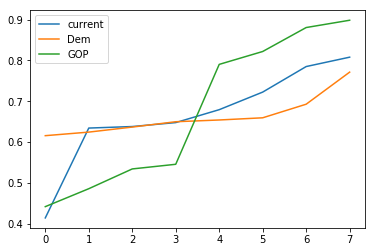

[[1, 0.41444830933060234], [2, 0.6343552171714304], [3, 0.6380966982859422], [4, 0.6477719071911189], [5, 0.6793625776189333], [6, 0.7224075684058615], [7, 0.7849095003639199], [8, 0.8078669978456471]]
[[1, 0.4420427499717309], [2, 0.4859390769159141], [3, 0.5343353884180411], [4, 0.5457050827004312], [5, 0.7902157937401598], [6, 0.8217523801479082], [7, 0.8804000429212916], [8, 0.8982458419443905]]


In [931]:
#### Area Between Two Curves ####

from shapely.geometry import Polygon

def area_between_two_curves(x_y_curve1, x_y_curve2):
    polygon_points = [] #creates a empty list where we will append the points to create the polygon

    for xyvalue in x_y_curve1:
        polygon_points.append([xyvalue[0],xyvalue[1]]) #append all xy points for curve 1

    for xyvalue in x_y_curve2[::-1]:
        polygon_points.append([xyvalue[0],xyvalue[1]]) #append all xy points for curve 2 in the reverse order (from last point to first point)

    for xyvalue in x_y_curve1[0:1]:
        polygon_points.append([xyvalue[0],xyvalue[1]]) #append the first point in curve 1 again, to it "closes" the polygon

    print(polygon_points)    
    
    polygon = Polygon(polygon_points)
    area = polygon.area
    return area

districtResults = pd.read_csv(districtResultsPath)

national_currentSimilarDem = {}
for sID in [24]:#districtResults.stateID.unique():
    state_districtResults = districtResults[districtResults.stateID==sID]
    state = state_districtResults.iloc[0]['state']
    state_curves = {}
    for mt in state_districtResults.maptype.unique():
        maptype_districtResults = state_districtResults[state_districtResults.maptype==mt]
        state_dem_votefrac = []
        for row in maptype_districtResults.itertuples():
            district_dem_votefrac = float(getattr(row,'district_dem_result'))/(getattr(row,'district_rep_result')+getattr(row,'district_dem_result'))
            state_dem_votefrac.append(district_dem_votefrac)
        if mt in ['current','Dem','GOP']:
            plt.plot(sorted(state_dem_votefrac), label=mt)
        curve = [list(elem) for elem in zip(range(1,len(state_dem_votefrac)+1),sorted(state_dem_votefrac))]
        state_curves.update({mt:curve})
    currentSimilarDem = area_between_two_curves(state_curves['current'],state_curves['Dem'])
    currentSimilarGOP = area_between_two_curves(state_curves['current'],state_curves['GOP'])
    print(currentSimilarDem,currentSimilarGOP)
    indicator = 0
    if currentSimilarDem < currentSimilarGOP:
        indicator = 1
    national_currentSimilarDem.update({state:indicator})

print(national_currentSimilarDem)
plt.legend()
plt.show()

print(state_curves['current'])
print(state_curves['GOP'])


In [29]:
#### Area Between Two Curves ####

from sklearn import metrics

districtResults = pd.read_csv(districtResultsPath)

national_currentSimilarDem = {}
for sID in districtResults.stateID.unique():
    state_districtResults = districtResults[districtResults.stateID==sID]
    state = state_districtResults.iloc[0]['state']
    state_curves = {}
    for mt in state_districtResults.maptype.unique():
        maptype_districtResults = state_districtResults[state_districtResults.maptype==mt]
        state_dem_votefrac = []
        for row in maptype_districtResults.itertuples():
            district_dem_votefrac = float(getattr(row,'district_dem_result'))/(getattr(row,'district_rep_result')+getattr(row,'district_dem_result'))
            state_dem_votefrac.append(district_dem_votefrac)
        curve = [range(1,len(state_dem_votefrac)+1),sorted(state_dem_votefrac)]
        state_curves.update({mt:curve})
    x = state_curves['current'][0]
    y = np.absolute(np.array(state_curves['current'][1]) - np.array(state_curves['Dem'][1]))
    if len(y) != 1:
        currentSimilarDem = metrics.auc(x, y)
        y = np.absolute(np.array(state_curves['current'][1]) - np.array(state_curves['GOP'][1]))
        currentSimilarGOP = metrics.auc(x, y)
        print(currentSimilarDem,currentSimilarGOP)
        indicator = 0
        if currentSimilarDem < currentSimilarGOP:
            indicator = 1
        national_currentSimilarDem.update({state:indicator})

print(national_currentSimilarDem)

(0.208366702033417, 0.0)
(0.11260089369513163, 0.20070261064513595)
(0.04851355662618173, 0.0)
(0.708937549268777, 0.7586226821183939)
(0.256995954534079, 0.311975544493061)
(0.03413309584813423, 0.13179638487362355)
(0.43829898107644916, 0.5953632600347147)
(0.6240572124962789, 0.5056292903425195)
(0.0, 0.012370179368288214)
(0.07187505459151247, 0.0)
(0.4597898701322132, 0.5916523512887578)
(0.2790658665149741, 0.48856512728538654)
(0.1359593367989266, 0.027602200075352995)
(0.08993472263918831, 0.06531274520839733)
(0.08526914329493032, 0.1953517110534332)
(0.2254469628019069, 0.0)
(0.026593455935370713, 0.01905151744496858)
(0.335372632614632, 0.8272314430083623)
(0.177057231202861, 0.19902522458682576)
(0.5361052153760435, 0.20041581045745452)
(0.26595993266880563, 0.17101868305592058)
(0.23011685977729318, 0.0)
(0.2214716760993191, 0.26668410555120337)
(0.05413403359938061, 0.10870709312354755)
(0.08260218955191265, 0.020490460857627263)
(0.019261486829980468, 0.01926148682998046

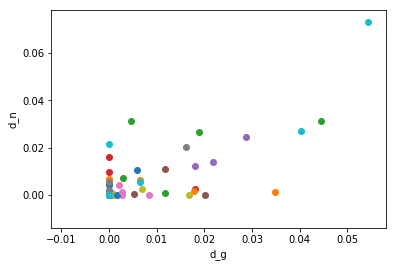

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~mymusic2357/0 or inside your plot.ly account where it is named 'basic-scatter'


In [33]:
#### Average Difference of Curves (RMSE) ####

districtResults = pd.read_csv(districtResultsPath)

dg = []
dn = []
texts = []
national_currentSimilarDem = {}
for sID in districtResults.stateID.unique():
    state_districtResults = districtResults[districtResults.stateID==sID]
    state = state_districtResults.iloc[0]['state']
    state_curves = {}
    for mt in state_districtResults.maptype.unique():
        maptype_districtResults = state_districtResults[state_districtResults.maptype==mt]
        state_dem_votefrac = []
        for row in maptype_districtResults.itertuples():
            district_dem_votefrac = float(getattr(row,'district_dem_result'))/(getattr(row,'district_rep_result')+getattr(row,'district_dem_result'))
            state_dem_votefrac.append(district_dem_votefrac)
        curve = sorted(state_dem_votefrac)
        state_curves.update({mt:curve})
    currentSimilarDem = np.sqrt(metrics.mean_squared_error(state_curves['current'],state_curves['Dem']))
    currentSimilarGOP = np.sqrt(metrics.mean_squared_error(state_curves['current'],state_curves['GOP']))
    currentSimilarCompact = np.sqrt(metrics.mean_squared_error(state_curves['current'],state_curves['Compact']))
    currentSimilarProportional = np.sqrt(metrics.mean_squared_error(state_curves['current'],state_curves['Proportional']))
    
    currentSimilarDem = metrics.mean_squared_error(state_curves['current'],state_curves['Dem'])*len(state_curves['current'])
    currentSimilarGOP = metrics.mean_squared_error(state_curves['current'],state_curves['GOP'])*len(state_curves['current'])
    currentSimilarCompact = metrics.mean_squared_error(state_curves['current'],state_curves['Compact'])*len(state_curves['current'])
    currentSimilarProportional = metrics.mean_squared_error(state_curves['current'],state_curves['Proportional'])*len(state_curves['current'])
    
    d_n = min(currentSimilarCompact,currentSimilarProportional)
    d_g = min(currentSimilarDem,currentSimilarGOP)
    dg.append(d_g)
    dn.append(d_n)
    texts.append(state)
    plt.scatter(d_g,d_n)
    
    #print(currentSimilarDem,currentSimilarGOP)
    #indicator = 0
    #if currentSimilarDem < currentSimilarGOP:
    #    indicator = 1
    #national_currentSimilarDem.update({state_names[state]:indicator})
plt.xlabel("d_g")
plt.ylabel("d_n")
plt.show()
#print(national_currentSimilarDem


import plotly.plotly as py
import plotly.graph_objs as go

trace = go.Scatter(
    x = dg,
    y = dn,
    mode = 'markers+text',
    text = texts
)

data = [trace]
layout = go.Layout(
    xaxis=dict(
        title='Distance from Gerrymander',
        type='log',
        autorange=True
    ),
    yaxis=dict(
        title='Distance from Neutral',
        type='log',
        autorange=True
    )
)

fig = go.Figure(data=data, layout=layout)
# Plot and embed in ipython notebook!
py.iplot(fig, filename='basic-scatter')


In [38]:
district2018HouseResults = pd.read_csv("../ElectionData/NYTHouseElectionData/2018HouseDistrictResultsAmended.csv",header=None)
#print(district2018HouseResults.head())
current_state_curve = {}
for index,row in district2018HouseResults.iterrows():
    temp = current_state_curve.get(row[0],[])
    temp.append(row[3]/(row[3]+row[4]))
    current_state_curve.update({row[0]:temp})
    #print(row[0], row[3], row[4])
#print(current_state_curve)
sorted_current_state_curve = {}
for key, value in current_state_curve.iteritems():
    sorted_value = sorted(value)
    sorted_current_state_curve.update({key:sorted_value})
print(sorted_current_state_curve)


{'WA': [0.35527350331348984, 0.4489605333103458, 0.47135685464952615, 0.5263806543028927, 0.5922287141575092, 0.6131785944551902, 0.6341170233959003, 0.7409247526045284, 0.8344013253520466, 0.879307424056743], 'DE': [0.6445396995495227], 'WI': [0.3628732166383195, 0.380002983969453, 0.3901420058924393, 0.43653431619983685, 0.44492125450985703, 0.5965286013614699, 0.685489027907561, 0.7774903413840627], 'WV': [0.35355325997981185, 0.43593519882179677, 0.4429216744338157], 'HI': [0.7601124896235099, 0.7735971063107483], 'FL': [0.32558666702755373, 0.32941362581733813, 0.3317929585685812, 0.3484928479676036, 0.377258364230161, 0.37741208295761947, 0.39501895835818124, 0.3954661843125279, 0.40574451448956655, 0.42375756942994364, 0.4368602933022428, 0.45438546081459663, 0.4569881323406132, 0.4697946145871277, 0.4799655003974028, 0.5087461513961142, 0.5172640184343024, 0.5307614551152717, 0.5764470566707995, 0.5769191992388106, 0.5802174989974287, 0.619064035823594, 0.6202369634812871, 0.65

('GOP', 0.23649403965502344)
('Dem', 0.3231425726009961)
('Compact', 0.23871811916222196)
('Proportional', 0.24240726376235017)
('Current:', [0.17176236394365088, 0.18637004893447623, 0.23330424285924017, 0.24729021108871865, 0.25268261753352106, 0.26654743737182485, 0.2742287865519514, 0.34493173717385434, 0.37545378787153133, 0.3774480741733468, 0.39623010441515777, 0.39794065263719863, 0.4206700610910157, 0.4490274939442809, 0.45463343818049845, 0.46080716705252583, 0.46269325912183057, 0.4745206235342806, 0.4797015477170753, 0.4836705853120681, 0.48474500064231574, 0.4856178383580523, 0.49719040731764524, 0.5250014404122049, 0.5321898802540179, 0.5997521077840957, 0.6066785418290224, 0.7114387864076723, 0.7166868219499798, 0.7231485562573703, 0.7320056929334066, 0.7583202633529239, 0.7637555660250025, 0.7650716000045167, 0.7764146563730463, 0.7832500608275947])
('Compact:', [0.17423886859105653, 0.2185958521460862, 0.24222326106858333, 0.2522748252638907, 0.2708133349852521, 0.2951

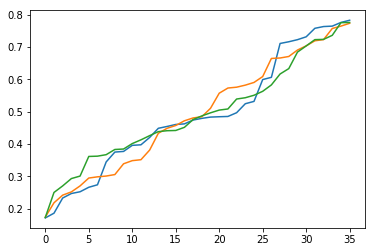

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~mymusic2357/0 or inside your plot.ly account where it is named 'basic-scatter'


In [42]:
import math

districtResults = pd.read_csv(districtResultsPath)

dg = []
dn = []
texts = []
national_currentSimilarDem = {}
for sID in districtResults.stateID.unique():
    state_districtResults = districtResults[districtResults.stateID==sID]
    state = state_districtResults.iloc[0]['state']
    state_curves = {}
    for mt in state_districtResults.maptype.unique():
        maptype_districtResults = state_districtResults[state_districtResults.maptype==mt]
        state_dem_votefrac = []
        for row in maptype_districtResults.itertuples():
            district_dem_votefrac = float(getattr(row,'district_dem_result'))/(getattr(row,'district_rep_result')+getattr(row,'district_dem_result'))
            state_dem_votefrac.append(district_dem_votefrac)
        curve = sorted(state_dem_votefrac)
        state_curves.update({mt:curve})

    #print(state)
    state_curves['current'] = sorted_current_state_curve[state]
    
    #print(state_curves['current'])
    gerrymander_index = 0
    for i in range(len(state_curves['current'])):
        gerrymander_index += math.pow(state_curves['current'][i] - state_curves['GOP'][i], 2)
    distanceGOP = math.pow(gerrymander_index, 0.5)
    
    
    gerrymander_index = 0
    for i in range(len(state_curves['current'])):
        gerrymander_index += math.pow(state_curves['current'][i] - state_curves['Dem'][i], 2)
    distanceDem = math.pow(gerrymander_index, 0.5)
    
    
    gerrymander_index = 0
    for i in range(len(state_curves['current'])):
        gerrymander_index += math.pow(state_curves['current'][i] - state_curves['Compact'][i], 2)
    distanceCompact = math.pow(gerrymander_index, 0.5)
    
    
    gerrymander_index = 0
    for i in range(len(state_curves['current'])):
        gerrymander_index += math.pow(state_curves['current'][i] - state_curves['Proportional'][i], 2)
    distanceProportional = math.pow(gerrymander_index, 0.5)
    
    
    if state in ["TX"]:
        print('GOP',distanceGOP)
        print('Dem',distanceDem)
        print('Compact',distanceCompact)
        print('Proportional',distanceProportional)
    
        print("Current:",state_curves['current'])
        print("Compact:",state_curves['Compact'])
        print("GOP:",state_curves['GOP'])
        plt.plot(state_curves['current'])
        plt.plot(state_curves['Compact'])
        plt.plot(state_curves['GOP'])
    
        
    d_n = min(distanceCompact,distanceProportional)
    d_g = min(distanceDem,distanceGOP)
    dg.append(d_g)
    dn.append(d_n)
    texts.append(state)
    #plt.scatter(d_g,d_n)
    
#plt.xlabel("d_g")
#plt.ylabel("d_n")
plt.show()


import plotly.plotly as py
import plotly.graph_objs as go

trace = go.Scatter(
    x = dg,
    y = dn,
    mode = 'markers+text',
    text = texts,
    textposition='bottom center'
)

random_x = np.linspace(0, 0.3, 500)
trace2 = go.Scatter(
    x = random_x,
    y = random_x
)


data = [trace, trace2]
layout = go.Layout(
    xaxis=dict(
        title='Distance from Gerrymander',
        #type='log',
        autorange=True
    ),
    yaxis=dict(
        title='Distance from Neutral',
        #type='log',
        autorange=True
    )
)

fig = go.Figure(data=data, layout=layout)
# Plot and embed in ipython notebook!
py.iplot(fig, filename='basic-scatter')


/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning:

divide by zero encountered in double_scalars

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning:

invalid value encountered in multiply



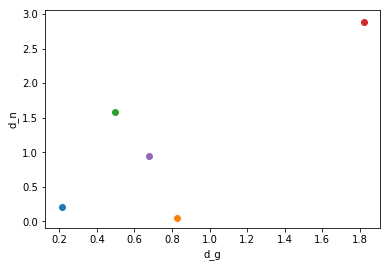

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~mymusic2357/0 or inside your plot.ly account where it is named 'basic-scatter'


In [37]:
from numpy import *
def perp( a ) :
    b = empty_like(a)
    b[0] = -a[1]
    b[1] = a[0]
    return b

# line segment a given by endpoints a1, a2
# line segment b given by endpoints b1, b2
# return 
def seg_intersect(a1,a2, b1,b2) :
    da = a2-a1
    db = b2-b1
    dp = a1-b1
    dap = perp(da)
    denom = dot( dap, db)
    num = dot( dap, dp )
    return (num / denom.astype(float))*db + b1


districtResults = pd.read_csv(districtResultsPath)

dg = []
dn = []
texts = []
national_currentSimilarDem = {}
for sID in districtResults.stateID.unique():
    state_districtResults = districtResults[districtResults.stateID==sID]
    state = state_districtResults.iloc[0]['state']
    state_curves = {}
    for mt in state_districtResults.maptype.unique():
        maptype_districtResults = state_districtResults[state_districtResults.maptype==mt]
        state_dem_votefrac = []
        for row in maptype_districtResults.itertuples():
            district_dem_votefrac = float(getattr(row,'district_dem_result'))/(getattr(row,'district_rep_result')+getattr(row,'district_dem_result'))
            state_dem_votefrac.append(district_dem_votefrac)
        curve = sorted(state_dem_votefrac)
        state_curves.update({mt:curve})
    
    #print(state_curves['current'])
    p1 = []
    p2 = []
    for x,y in enumerate(state_curves['current']):
        if y > 0.5:
            p2 = [x+1,y]
            p1 = [x,state_curves['current'][x-1]]
            break
    
    if len(p1) > 1:
        p3 = array([0,0.5])
        p4 = array([100,0.5])
        p1 = array(p1)
        p2 = array(p2)
        cur50 = seg_intersect(p1,p2,p3,p4)[0]
        
    p1 = []
    p2 = []
    for x,y in enumerate(state_curves['Dem']):
        if y > 0.5:
            p2 = [x+1,y]
            p1 = [x,state_curves['Dem'][x-1]]
            break
    
    if len(p1) > 1:
        p3 = array([0,0.5])
        p4 = array([100,0.5])
        p1 = array(p1)
        p2 = array(p2)
        Dem50 = seg_intersect(p1,p2,p3,p4)[0]
        
    p1 = []
    p2 = []
    for x,y in enumerate(state_curves['GOP']):
        if y > 0.5:
            p2 = [x+1,y]
            p1 = [x,state_curves['GOP'][x-1]]
            break
    
    if len(p1) > 1:
        p3 = array([0,0.5])
        p4 = array([100,0.5])
        p1 = array(p1)
        p2 = array(p2)
        GOP50 = seg_intersect(p1,p2,p3,p4)[0]
        
    p1 = []
    p2 = []
    for x,y in enumerate(state_curves['Compact']):
        if y > 0.5:
            p2 = [x+1,y]
            p1 = [x,state_curves['Compact'][x-1]]
            break
    
    if len(p1) > 1:
        p3 = array([0,0.5])
        p4 = array([100,0.5])
        p1 = array(p1)
        p2 = array(p2)
        Compact50 = seg_intersect(p1,p2,p3,p4)[0]
        
    p1 = []
    p2 = []
    for x,y in enumerate(state_curves['Proportional']):
        if y > 0.5:
            p2 = [x+1,y]
            p1 = [x,state_curves['Proportional'][x-1]]
            break
    
    if len(p1) > 1:
        p3 = array([0,0.5])
        p4 = array([100,0.5])
        p1 = array(p1)
        p2 = array(p2)
        Proportional50 = seg_intersect(p1,p2,p3,p4)[0]
            
    if state in ["OH","NC","MI","TX","CA"]:
        #print(cur50, Dem50, GOP50, Compact50)
        distanceDem = abs(cur50 - Dem50)
        distanceGOP = abs(cur50 - GOP50)
        distanceCompact = abs(cur50 - Compact50)
        distanceProportional = abs(cur50 - Proportional50)

        d_n = min(distanceCompact,distanceProportional)
        d_g = min(distanceDem,distanceGOP)
        dg.append(d_g)
        dn.append(d_n)
        texts.append(state)
        plt.scatter(d_g,d_n)
    
    #print(currentSimilarDem,currentSimilarGOP)
    #indicator = 0
    #if currentSimilarDem < currentSimilarGOP:
    #    indicator = 1
    #national_currentSimilarDem.update({state_names[state]:indicator})
plt.xlabel("d_g")
plt.ylabel("d_n")
plt.show()
#print(national_currentSimilarDem


import plotly.plotly as py
import plotly.graph_objs as go

trace = go.Scatter(
    x = dg,
    y = dn,
    mode = 'markers+text',
    text = texts
)
random_x = np.linspace(0, 2, 500)
trace2 = go.Scatter(
    x = random_x,
    y = random_x
)

data = [trace,trace2]
layout = go.Layout(
    xaxis=dict(
        title='Distance from Gerrymander',
        autorange=True
    ),
    yaxis=dict(
        title='Distance from Neutral',
        autorange=True
    )
)

fig = go.Figure(data=data, layout=layout)
# Plot and embed in ipython notebook!
py.iplot(fig, filename='basic-scatter')

In [2]:
import plotly.plotly as py
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

for col in df.columns:
    df[col] = df[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

df['text'] = df['state'] + '<br>' +\
    'Beef '+df['beef']+' Dairy '+df['dairy']+'<br>'+\
    'Fruits '+df['total fruits']+' Veggies ' + df['total veggies']+'<br>'+\
    'Wheat '+df['wheat']+' Corn '+df['corn']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df['code'],
        z = df['total exports'].astype(float),
        locationmode = 'USA-states',
        text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Millions USD")
        ) ]

layout = dict(
        title = '2011 US Agriculture Exports by State<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

Aw, snap! We didn't get a username with your request.

Don't have an account? https://plot.ly/api_signup

Questions? accounts@plot.ly


PlotlyError: Because you didn't supply a 'file_id' in the call, we're assuming you're trying to snag a figure from a url. You supplied the url, '', we expected it to start with 'https://plot.ly'.
Run help on this function for more information.

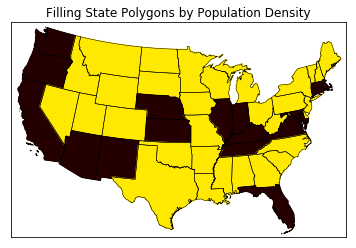

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# draw state boundaries.
# data from U.S Census Bureau
# http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('st99_d00','states',drawbounds=True)
# population density by state from
# http://en.wikipedia.org/wiki/List_of_U.S._states_by_population_density
popdensity = national_currentSimilarDem
# choose a color for each state based on population density.
colors={}
statenames=[]
cmap = plt.cm.hot # use 'hot' colormap
vmin = -.1; vmax = 1.1 # set range.
for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename not in ['District of Columbia','Puerto Rico']:
        pop = popdensity[statename]
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # population), take sqrt root to spread out colors more.
        colors[statename] = cmap(1.-np.sqrt((pop-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)
# cycle through state names, color each one.
ax = plt.gca() # get current axes instance
for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] not in ['District of Columbia','Puerto Rico']:
        color = rgb2hex(colors[statenames[nshape]]) 
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)
plt.title('Filling State Polygons by Population Density')
plt.show()

In [ ]:
##### Hawaii has 8 main islands but several tiny atolls that extend for many miles.
# This is the area cutoff between the 8 main islands and the tiny atolls.
ATOLL_CUTOFF = 0.005

m = Basemap(llcrnrlon=-121,llcrnrlat=20,urcrnrlon=-62,urcrnrlat=51,
    projection='lcc',lat_1=32,lat_2=45,lon_0=-95)

# load the shapefile, use the name 'states'
m.readshapefile('st99_d00', name='states', drawbounds=True)

ax = plt.gca()


for i, shapedict in enumerate(m.states_info):
    # Translate the noncontiguous states:
    if shapedict['NAME'] in ['Alaska', 'Hawaii']:
        seg = m.states[int(shapedict['SHAPENUM'] - 1)]
        # Only include the 8 main islands of Hawaii so that we don't put dots in the western states.
        if shapedict['NAME'] == 'Hawaii' and float(shapedict['AREA']) > ATOLL_CUTOFF:
            seg = list(map(lambda (x, y): (x + 5200000, y-1400000), seg))
        # Alaska is large. Rescale it.
        elif shapedict['NAME'] == 'Alaska':
            seg = list(map(lambda (x, y): (0.35*x + 1100000, 0.35*y-1300000), seg))
        poly = Polygon(seg, facecolor='white', edgecolor='black', linewidth=.5)
        ax.add_patch(poly)


In [33]:
import plotly 
plotly.tools.set_credentials_file(username='mymusic2357', api_key='8QdgN3BVVLgeuprKalWG')